In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import folium
# Cause plots to be displayed in the notebook:
%pylab inline
%matplotlib inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
# Override default figure sizing:
pylab.rcParams['figure.figsize'] = (10, 10)
sns.set(color_codes = True)

In [3]:
df = pd.read_csv("/Users/macbookair/Documents/Institute of data/mfsnowcrab.csv")

In [4]:
df.head()

id  latitude  longitude  year       name   sex  bottom_depth  \
0  147038  57.00000 -166.45000  1975  snow crab  male            71   
1  147037  57.00000 -167.08333  1975  snow crab  male            71   
2  147036  57.00000 -167.68333  1975  snow crab  male            75   
3  147035  56.66667 -172.56667  1975  snow crab  male           132   
4  147034  56.66667 -171.96667  1975  snow crab  male           123   

   surface_temperature  bottom_temperature  haul    cpue  
0                  9.1                 1.1   117   40356  
1                  8.7                 1.4   118   68691  
2                  8.8                 1.6   139  119748  
3                  6.1                 2.5    89    7882  
4                  5.7                 2.1    90   11258

In [5]:
df.tail()

id  latitude  longitude  year       name     sex  bottom_depth  \
17922  167236  59.01374 -169.17953  2018  snow crab  female            54   
17923  167235  58.70274 -173.01226  2018  snow crab  female           113   
17924  167234  58.67382 -172.36066  2018  snow crab  female           101   
17925  167233  58.66392 -171.72005  2018  snow crab  female            93   
17926  167232  58.66620 -171.08591  2018  snow crab  female            82   

       surface_temperature  bottom_temperature  haul   cpue  
17922                  6.9                 4.2    94    140  
17923                  7.6                 3.5   150    435  
17924                  7.5                 3.4   159   1880  
17925                  7.9                 3.4   135    598  
17926                  7.7                 3.6   142  35198

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17927 entries, 0 to 17926
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   17927 non-null  int64  
 1   latitude             17927 non-null  float64
 2   longitude            17927 non-null  float64
 3   year                 17927 non-null  int64  
 4   name                 17927 non-null  object 
 5   sex                  17927 non-null  object 
 6   bottom_depth         17927 non-null  int64  
 7   surface_temperature  17927 non-null  float64
 8   bottom_temperature   17927 non-null  float64
 9   haul                 17927 non-null  int64  
 10  cpue                 17927 non-null  int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 1.5+ MB


<h3> Interpretation </h3>
<p> There is no null values </p>

In [7]:
df.describe().T

count           mean            std           min  \
id                   17927.0  162675.094048    7390.543287  145878.00000   
latitude             17927.0      58.529967       1.674403      54.66667   
longitude            17927.0    -170.670173       3.871000    -178.22309   
year                 17927.0    1997.763653      12.039272    1975.00000   
bottom_depth         17927.0      90.006192      28.336891      22.00000   
surface_temperature  17927.0       7.124287       1.979158      -1.10000   
bottom_temperature   17927.0       1.802226       1.737456      -2.10000   
haul                 17927.0     123.805991      51.736292       1.00000   
cpue                 17927.0   32875.689240  115427.675474      52.00000   

                              25%           50%           75%           max  
id                   158285.50000  163807.00000  168610.50000  1.734220e+05  
latitude                 57.16622      58.34467      59.99226  6.204450e+01  
longitude              -173.58991    -170.85025    -167.85055 -1.583980e+02  
year                   1988.00000    1998.00000    2008.00000  2.018000e+03  
bottom_depth             68.00000      84.00000     110.00000  2.760000e+02  
surface_temperature       5.90000       7.30000       8.60000  1.410000e+01  
bottom_temperature        0.60000       2.00000       3.20000  1.000000e+01  
haul                     86.00000     127.00000     164.00000  3.340000e+02  
cpue                    483.00000    3215.00000   21008.50000  5.117962e+06

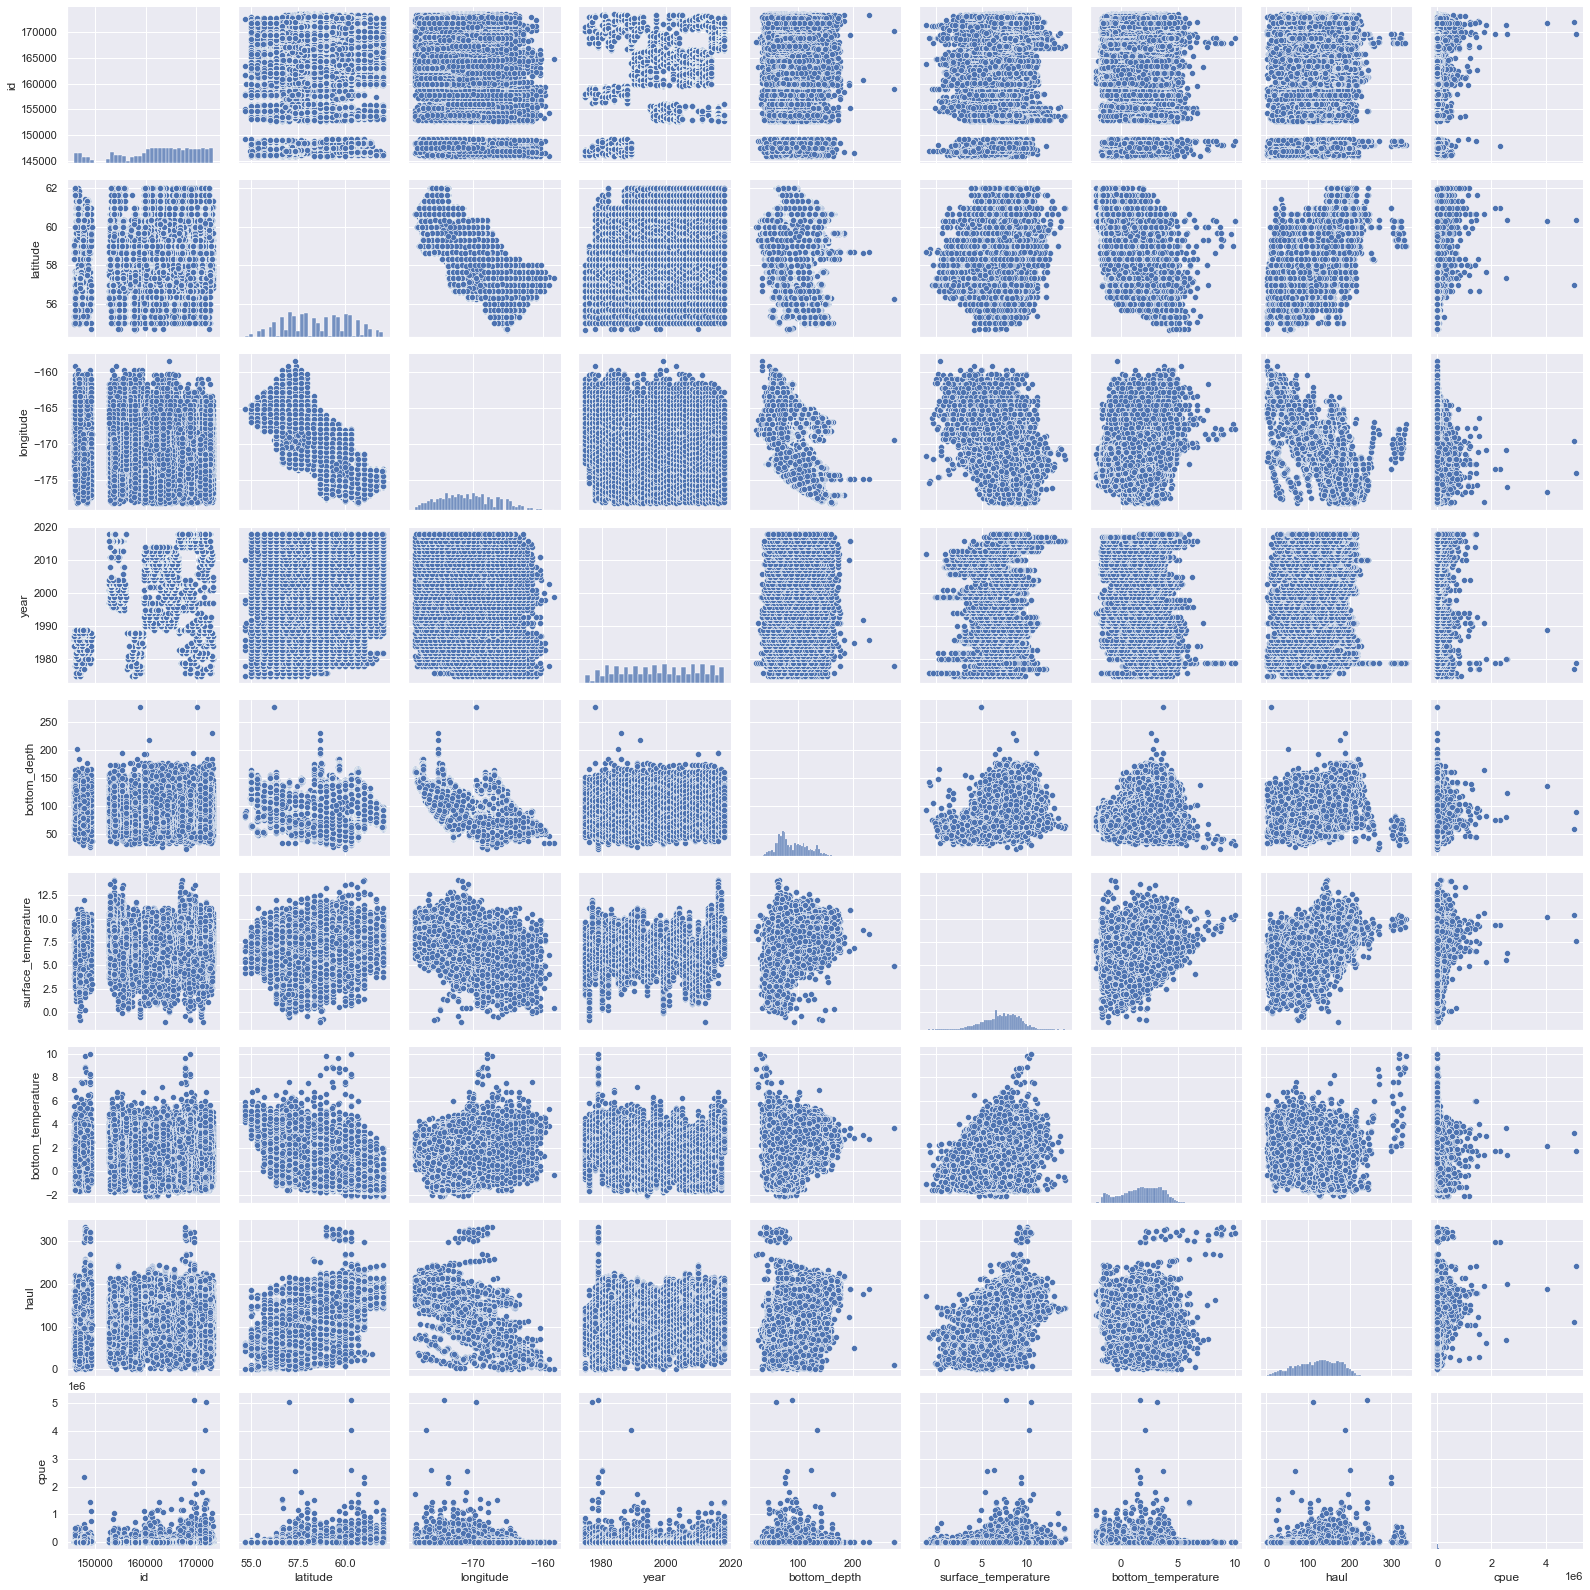

In [8]:
sns.pairplot(df)

In [9]:
df.groupby('year')['sex'].value_counts()

year  sex   
1975  male      108
      female     76
1976  male      104
      female     90
1977  male       63
               ... 
2016  female    174
2017  male      221
      female    158
2018  male      219
      female    171
Name: sex, Length: 88, dtype: int64

In [10]:
year_count = df['year'].value_counts()
year_count.head()

2012    484
1998    482
2008    481
2009    478
1999    476
Name: year, dtype: int64

In [11]:
years = np.array(df['year'].unique())
years.sort()

<h3> Data Engineering </h3>
<p> Aggregate the data by grouping on the year feature </p>

In [12]:
year_list = []
max_lat_list = []
max_long_list =[]
max_bottom_list = []
max_surfacet_list = []
max_bottomt_list = []
max_haul_list = []
total_catch_list = []
for y in sorted(df['year'].unique()):
    
    df_subset = df.loc[df['year'] == y]
    max_lat = df_subset.latitude.mean()
    max_long = df_subset.longitude.mean()
    max_bottom = df_subset.bottom_depth.mean()
    max_surfacet = df_subset.surface_temperature.mean()
    max_bottomt = df_subset.bottom_temperature.mean()
    max_haul = df_subset.haul.mean()
    total_catch = df_subset.shape[0]
    year_list.append(y)
    max_lat_list.append(max_lat)
    max_long_list.append(max_long)
    max_bottom_list.append(max_bottom)
    max_surfacet_list.append(max_surfacet)
    max_bottomt_list.append(max_bottomt)
    max_haul_list.append(max_haul)
    total_catch_list.append(total_catch)                        

In [13]:
new_data = pd.DataFrame()
new_data['year'] = year_list
new_data['mean_lat'] = max_lat_list
new_data['mean_long'] = max_long_list
new_data['mean_bottom'] = max_bottom_list
new_data['mean_surfacetemp'] = max_surfacet_list
new_data['mean_bottomtemp'] = max_bottomt_list
new_data['mean_haul'] = max_haul_list
new_data['total_catch'] = total_catch_list

new_data.head()

year   mean_lat   mean_long  mean_bottom  mean_surfacetemp  \
0  1975  56.619747 -166.820289    89.070652          6.415761   
1  1976  56.917268 -167.464347    91.701031          4.692268   
2  1977  56.961005 -167.772012    89.122642          8.933962   
3  1978  57.761178 -169.434204    93.705696          6.495570   
4  1979  58.391326 -170.266240    85.755952          8.138095   

   mean_bottomtemp   mean_haul  total_catch  
0         1.798370   85.907609          184  
1         1.287113  100.922680          194  
2         3.068868   94.962264          106  
3         2.956329   91.816456          316  
4         3.982440  160.395833          336

In [14]:
dat_dict = {'year' : year_list, 'freq_lat' :max_lat_list, 'freq_long' :max_long_list, 'freq_bottom':max_bottom_list, 'freq_surfacetemp':max_surfacet_list, 'freq_bottomtemp':max_bottomt_list, 'freq_haul':max_haul_list} 
dat = pd.DataFrame(dat_dict)
print (dat.head())

   year   freq_lat   freq_long  freq_bottom  freq_surfacetemp  \
0  1975  56.619747 -166.820289    89.070652          6.415761   
1  1976  56.917268 -167.464347    91.701031          4.692268   
2  1977  56.961005 -167.772012    89.122642          8.933962   
3  1978  57.761178 -169.434204    93.705696          6.495570   
4  1979  58.391326 -170.266240    85.755952          8.138095   

   freq_bottomtemp   freq_haul  
0         1.798370   85.907609  
1         1.287113  100.922680  
2         3.068868   94.962264  
3         2.956329   91.816456  
4         3.982440  160.395833  


<h3> Data Engineering </h3>
<p> Grouping the data based on sex feature to explore the sex baed differences in the snow crab fishing </p>

In [15]:
year_list = []
male_count_list = []
female_count_list = []

for y in df['year'].unique():
    
    df_subset = df.loc[df['year'] == y]
    male_count = df_subset[df_subset['sex'] == 'male'].sex.count()
    female_count = df_subset[df_subset['sex'] == 'female'].sex.count()
    year_list.append(y)
    male_count_list.append(male_count)
    female_count_list.append(female_count)

In [16]:
df.groupby('sex').head()


id  latitude  longitude  year       name     sex  bottom_depth  \
0   147038  57.00000 -166.45000  1975  snow crab    male            71   
1   147037  57.00000 -167.08333  1975  snow crab    male            71   
2   147036  57.00000 -167.68333  1975  snow crab    male            75   
3   147035  56.66667 -172.56667  1975  snow crab    male           132   
4   147034  56.66667 -171.96667  1975  snow crab    male           123   
71  171038  57.33333 -167.71667  1975  snow crab  female            71   
78  171037  57.00000 -172.03333  1975  snow crab  female           113   
79  171036  57.00000 -171.40000  1975  snow crab  female           104   
80  171035  57.00000 -170.80000  1975  snow crab  female            95   
81  171034  57.03333 -170.25000  1975  snow crab  female            66   

    surface_temperature  bottom_temperature  haul    cpue  
0                   9.1                 1.1   117   40356  
1                   8.7                 1.4   118   68691  
2                   8.8                 1.6   139  119748  
3                   6.1                 2.5    89    7882  
4                   5.7                 2.1    90   11258  
71                  9.0                 1.6   138  345451  
78                  5.1                 1.5    87   16644  
79                  5.5                 1.8    84   81901  
80                  5.4                 3.3    82     622  
81                  4.2                 2.0    81    1727

In [17]:
new_data['male'] = male_count_list
new_data['female'] = female_count_list
new_data.head()

year   mean_lat   mean_long  mean_bottom  mean_surfacetemp  \
0  1975  56.619747 -166.820289    89.070652          6.415761   
1  1976  56.917268 -167.464347    91.701031          4.692268   
2  1977  56.961005 -167.772012    89.122642          8.933962   
3  1978  57.761178 -169.434204    93.705696          6.495570   
4  1979  58.391326 -170.266240    85.755952          8.138095   

   mean_bottomtemp   mean_haul  total_catch  male  female  
0         1.798370   85.907609          184   108      76  
1         1.287113  100.922680          194   104      90  
2         3.068868   94.962264          106    63      43  
3         2.956329   91.816456          316   183     133  
4         3.982440  160.395833          336   192     144

In [18]:
data_dict = {'year' : year_list, 'male' :male_count_list, 'female' :female_count_list}
data = pd.DataFrame(data_dict)
print (data.head())

   year  male  female
0  1975   108      76
1  1976   104      90
2  1977    63      43
3  1978   183     133
4  1979   192     144


<AxesSubplot:ylabel='Frequency'>

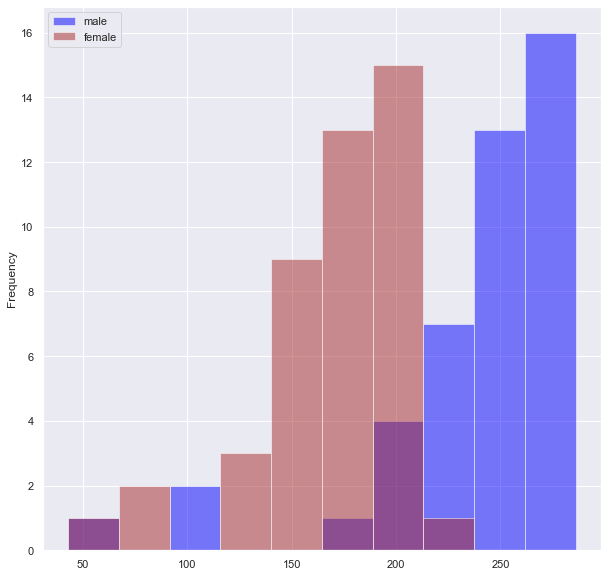

In [19]:
data[['male', 'female']].plot.hist(bins = 10, color = ['blue','brown'], alpha = 0.5)

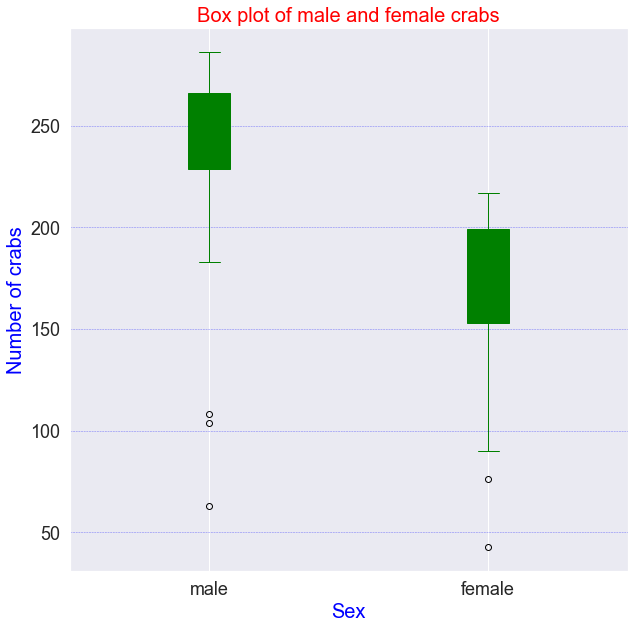

In [20]:
data.boxplot(['male', 'female'], fontsize = 18, patch_artist = True, color='green')
plt.grid(color ='blue', axis = 'y', linestyle = '--', linewidth = 0.5, alpha = 0.5)
plt.title('Box plot of male and female crabs', fontsize = 20, color = 'red')
plt.ylabel('Number of crabs', fontsize = 20, color = 'blue')
plt.xlabel('Sex', fontsize = 20, color = 'blue')
plt.savefig('/Users/macbookair/Documents/Institute of data/Box plot of male and female crabs.png', dpi=300, bbox_inches='tight')




In [21]:
df_subset = df.loc[df['year'] == 1975]
df_subset
df_subset[df_subset['sex'] == 'male'].sex.count()

108

In [22]:
df.nunique()

id                     17927
latitude                8937
longitude              10270
year                      44
name                       1
sex                        2
bottom_depth             155
surface_temperature      142
bottom_temperature       104
haul                     292
cpue                   10645
dtype: int64

<h3> EDA </h3>


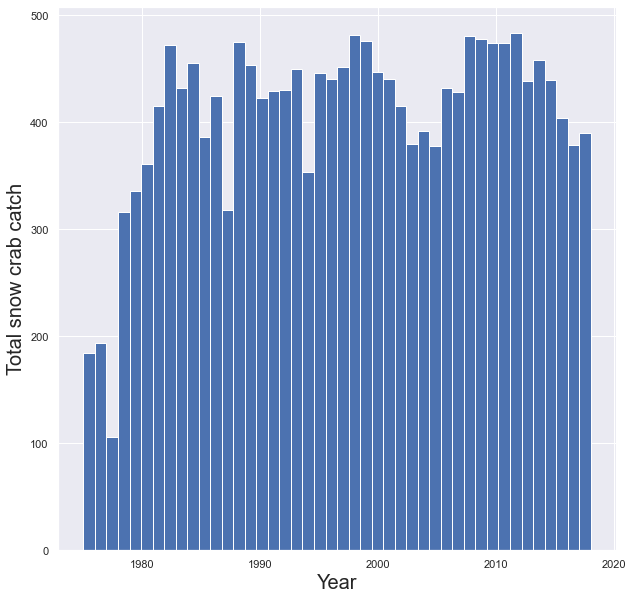

In [23]:
df['year'].plot.hist(bins = 44)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Total snow crab catch', fontsize = 20)
plt.savefig('/Users/macbookair/Documents/Institute of data/Total snow crab catch.png', dpi=300, bbox_inches='tight')

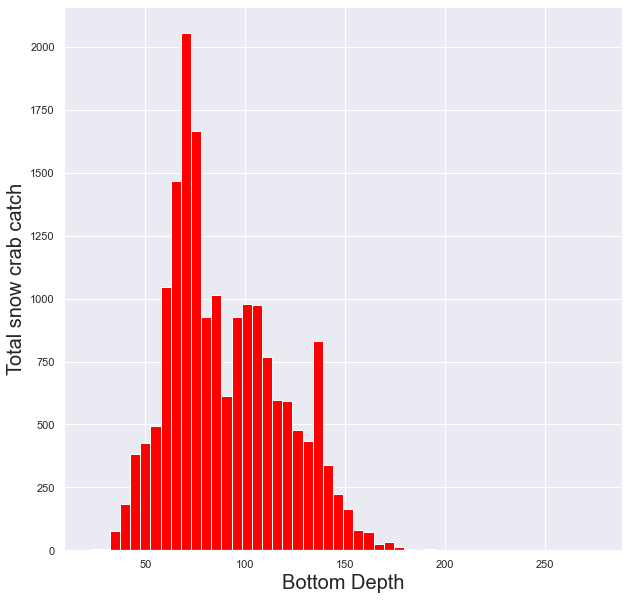

In [24]:
df['bottom_depth'].plot.hist(bins = 50, color = 'red')
plt.xlabel('Bottom Depth', fontsize = 20)
plt.ylabel('Total snow crab catch', fontsize = 20)
plt.savefig('/Users/macbookair/Documents/Institute of data/Total snow crab catch and Bottom depth.png', dpi=300, bbox_inches='tight')



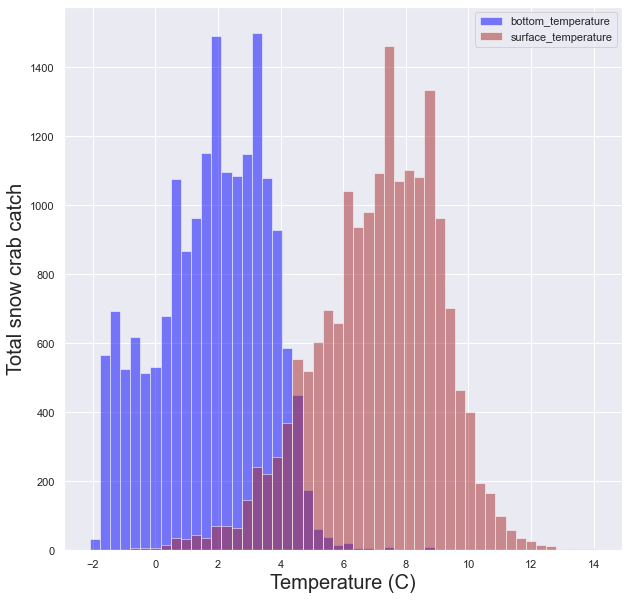

In [25]:
df[['bottom_temperature', 'surface_temperature']].plot.hist(bins = 50, color = ['blue','brown'], alpha = 0.5)
plt.xlabel('Temperature (C)', fontsize = 20)
plt.ylabel('Total snow crab catch', fontsize = 20)
plt.savefig('/Users/macbookair/Documents/Institute of data/Bottom Temperature vs Surface Temperature.png', dpi=300, bbox_inches='tight')



<AxesSubplot:xlabel='surface_temperature', ylabel='bottom_temperature'>

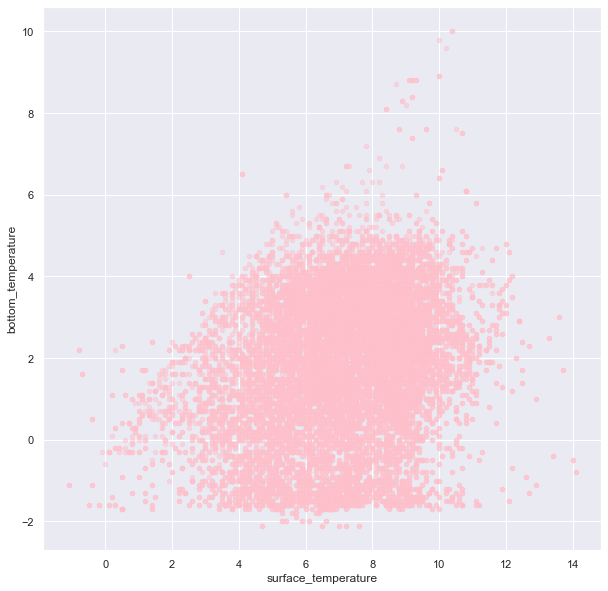

In [26]:
df.plot.scatter(x='surface_temperature', y = 'bottom_temperature', color = 'pink', alpha = 0.5, )

<AxesSubplot:xlabel='surface_temperature', ylabel='bottom_temperature'>

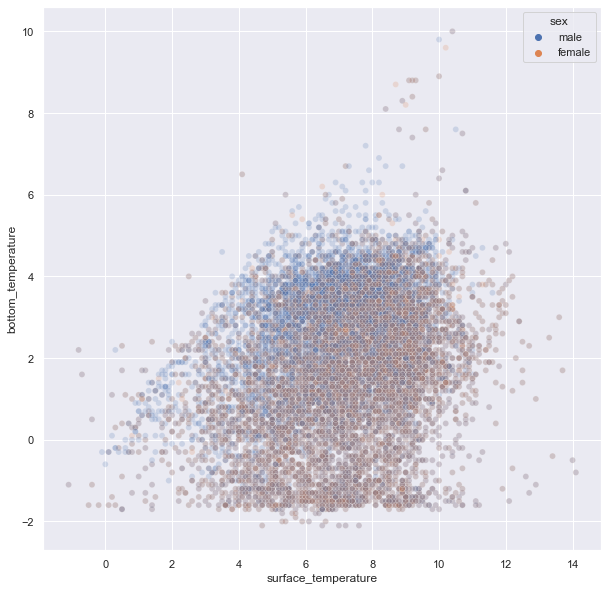

In [27]:
sns.scatterplot(x='surface_temperature', y = 'bottom_temperature', data = df, alpha = 0.2,hue = 'sex')

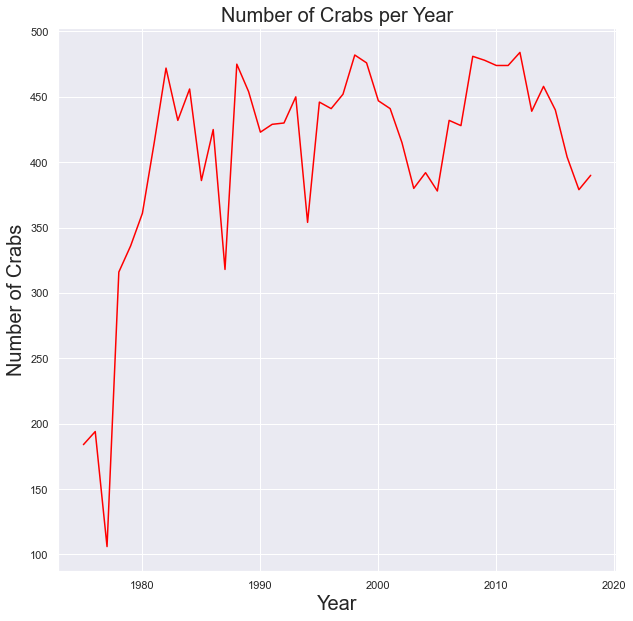

<Figure size 720x720 with 0 Axes>

In [28]:
df.groupby(df.year).size().plot(color = 'red');
plt.title('Number of Crabs per Year', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Number of Crabs', fontsize = 20)
plt.show()
plt.savefig('/Users/macbookair/Documents/Institute of data/Number of Crabs per Year.png', dpi=300, bbox_inches='tight')



In [29]:
new_data.head()

year   mean_lat   mean_long  mean_bottom  mean_surfacetemp  \
0  1975  56.619747 -166.820289    89.070652          6.415761   
1  1976  56.917268 -167.464347    91.701031          4.692268   
2  1977  56.961005 -167.772012    89.122642          8.933962   
3  1978  57.761178 -169.434204    93.705696          6.495570   
4  1979  58.391326 -170.266240    85.755952          8.138095   

   mean_bottomtemp   mean_haul  total_catch  male  female  
0         1.798370   85.907609          184   108      76  
1         1.287113  100.922680          194   104      90  
2         3.068868   94.962264          106    63      43  
3         2.956329   91.816456          316   183     133  
4         3.982440  160.395833          336   192     144

In [30]:
new_data.set_index('year', inplace = True)

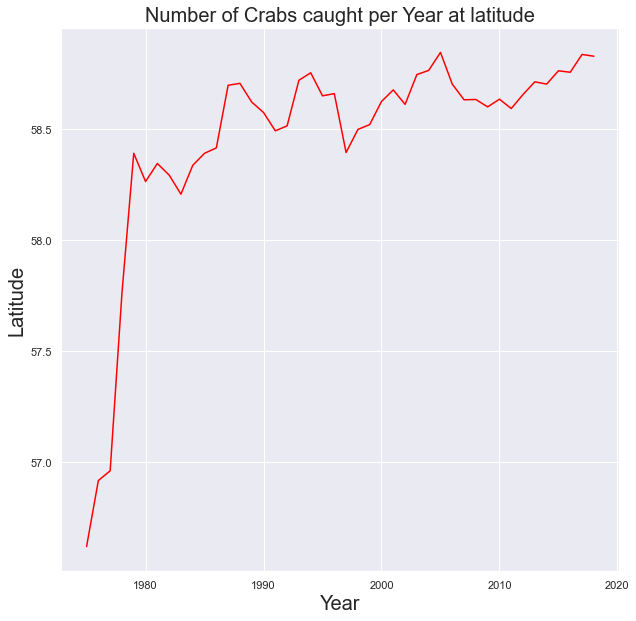

In [31]:
new_data.mean_lat.plot(color = 'red')
plt.title('Number of Crabs caught per Year at latitude', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Latitude', fontsize = 20)
plt.savefig('/Users/macbookair/Documents/Institute of data/Number of Crabs caught per Year at latitude.png', dpi=300, bbox_inches='tight')



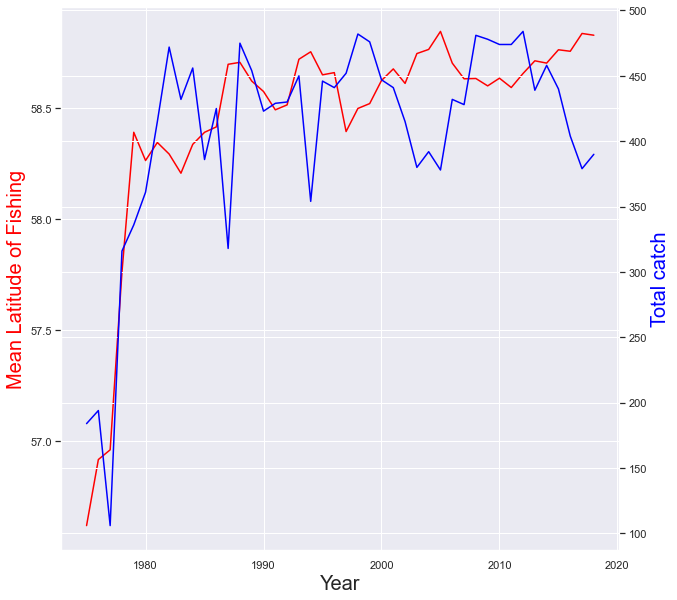

In [32]:
fig, ax = plt.subplots(figsize=(10,10)) 
ax1 = ax.twinx()
ax.set_xlabel("Year", fontsize = 20)

ax.set_ylabel("Mean Latitude of Fishing", fontsize = 20)
ax1.set_ylabel("Total catch", fontsize = 20)

p1, = ax.plot(new_data.mean_lat,color='red', label="Mean Latitude of Fishing")
p2, = ax1.plot(new_data.total_catch, color='blue', label="Total catch")

ax.yaxis.label.set_color('red')
ax1.yaxis.label.set_color('blue')
plt.savefig('/Users/macbookair/Documents/Institute of data/Number of Crabs caught per Year at latitude.png', dpi=300, bbox_inches='tight')


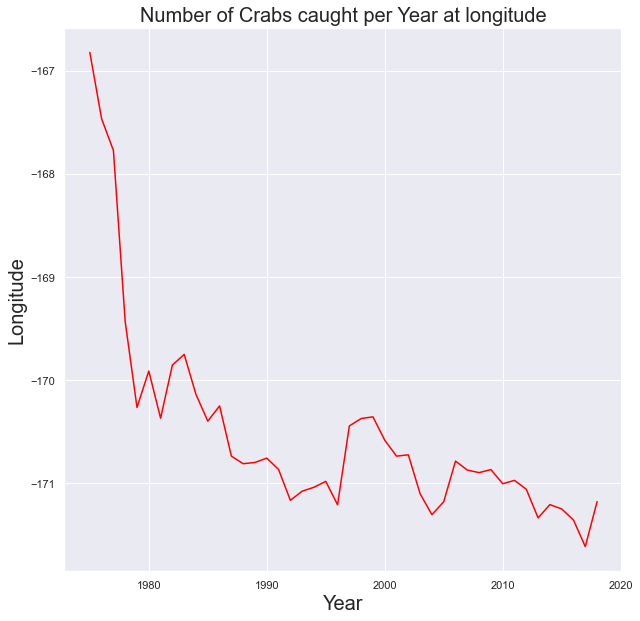

In [33]:
new_data.mean_long.plot(color = 'red')
plt.title('Number of Crabs caught per Year at longitude', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Longitude', fontsize = 20)
plt.savefig('/Users/macbookair/Documents/Institute of data/Number of Crabs caught per Year at longitude.png', dpi=300, bbox_inches='tight')


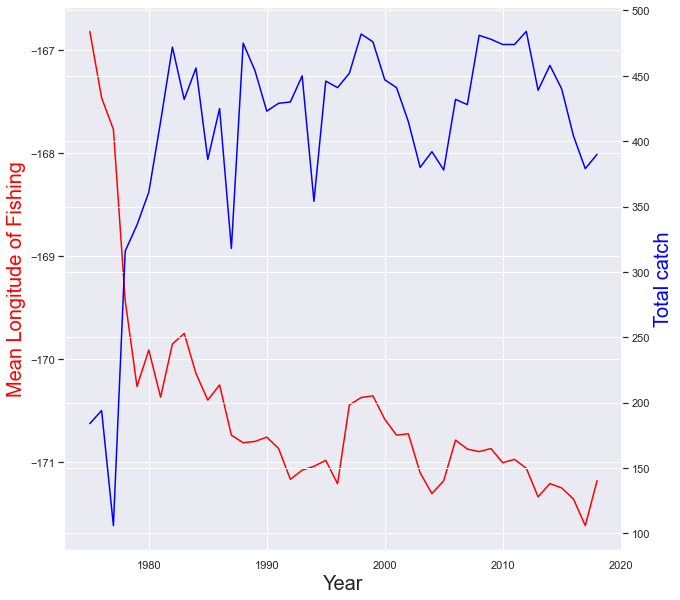

In [34]:
fig, ax = plt.subplots(figsize=(10,10)) 
ax1 = ax.twinx()
ax.set_xlabel("Year", fontsize = 20)

ax.set_ylabel("Mean Longitude of Fishing", fontsize = 20)
ax1.set_ylabel("Total catch", fontsize = 20)

p1, = ax.plot(new_data.mean_long,color='red', label="Mean Longitude of Fishing")
p2, = ax1.plot(new_data.total_catch, color='blue', label="Total catch")

ax.yaxis.label.set_color('red')
ax1.yaxis.label.set_color('blue')
plt.savefig('/Users/macbookair/Documents/Institute of data/Number of Crabs caught per Year at longitude.png', dpi=300, bbox_inches='tight')


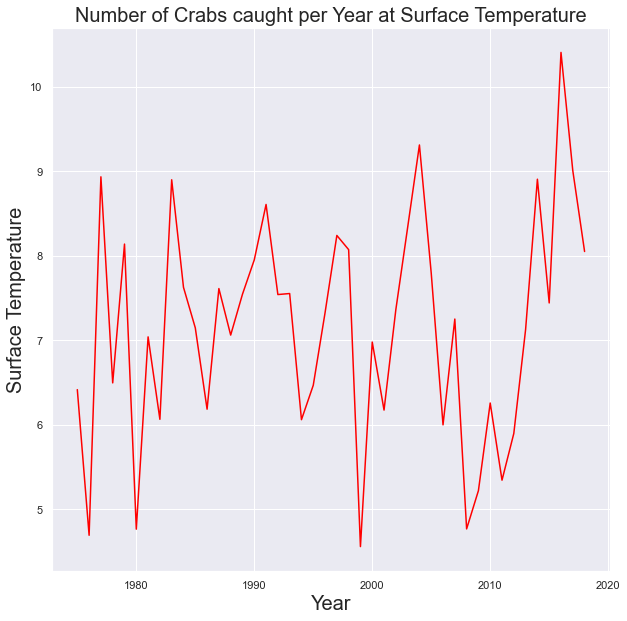

In [35]:
new_data.mean_surfacetemp.plot(color = 'red')
plt.title('Number of Crabs caught per Year at Surface Temperature', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Surface Temperature', fontsize = 20)
plt.savefig('/Users/macbookair/Documents/Institute of data/Number of Crabs caught per Year at Surface Temperature alone.png', dpi=300, bbox_inches='tight')


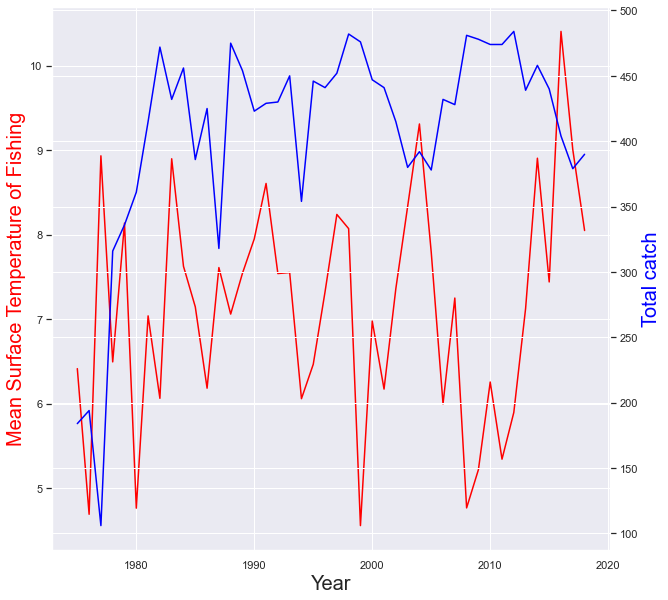

In [36]:
fig, ax = plt.subplots(figsize=(10,10)) 
ax1 = ax.twinx()
ax.set_xlabel("Year", fontsize = 20)

ax.set_ylabel("Mean Surface Temperature of Fishing", fontsize = 20)
ax1.set_ylabel("Total catch", fontsize = 20)

p1, = ax.plot(new_data.mean_surfacetemp,color='red', label="Mean Latitude of Fishing")
p2, = ax1.plot(new_data.total_catch, color='blue', label="Total catch")

ax.yaxis.label.set_color('red')
ax1.yaxis.label.set_color('blue')
plt.savefig('/Users/macbookair/Documents/Institute of data/Number of Crabs caught per Year at Surface Temperature.png', dpi=300, bbox_inches='tight')


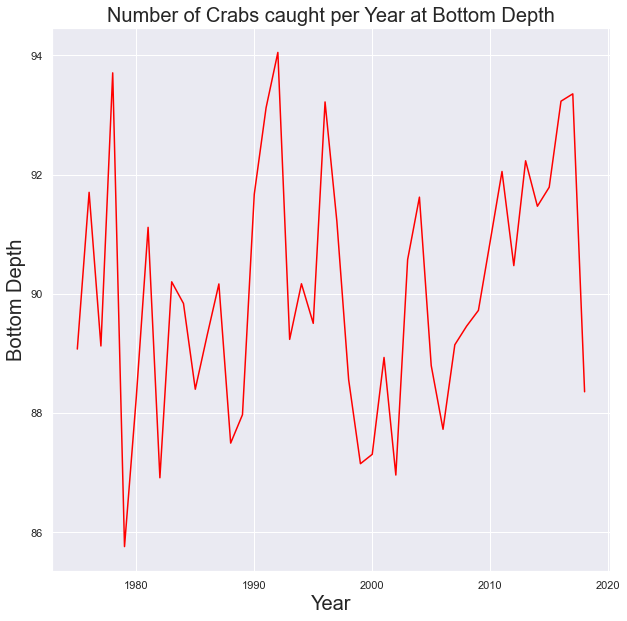

In [37]:
new_data.mean_bottom.plot(color = 'red')
plt.title('Number of Crabs caught per Year at Bottom Depth', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Bottom Depth', fontsize = 20)
plt.savefig('/Users/macbookair/Documents/Institute of data/Number of Crabs caught per Year at Bottom Depth.png', dpi=300, bbox_inches='tight')


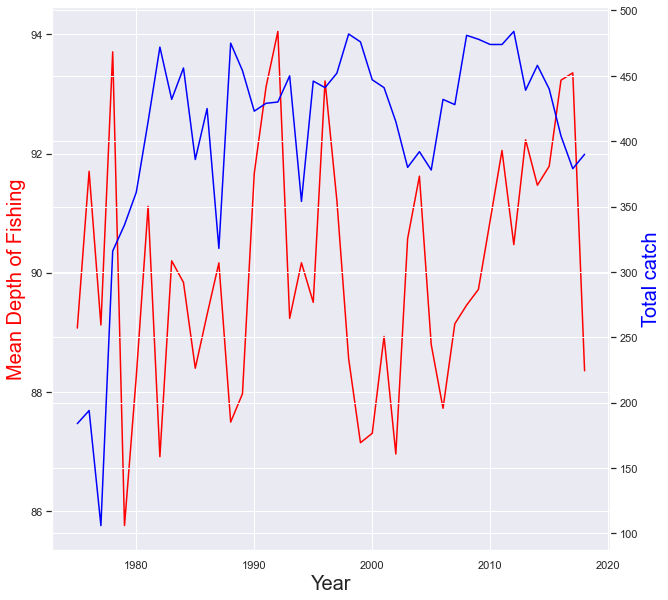

In [38]:
fig, ax = plt.subplots(figsize=(10,10)) 
ax1 = ax.twinx()
ax.set_xlabel("Year", fontsize = 20)

ax.set_ylabel("Mean Depth of Fishing", fontsize = 20)
ax1.set_ylabel("Total catch", fontsize = 20)

p1, = ax.plot(new_data.mean_bottom,color='red', label="Mean Depth of Fishing")
p2, = ax1.plot(new_data.total_catch, color='blue', label="Total catch")

ax.yaxis.label.set_color('red')
ax1.yaxis.label.set_color('blue')
plt.savefig('/Users/macbookair/Documents/Institute of data/Number of Crabs caught per Year at Bottom Depth.png', dpi=300, bbox_inches='tight')


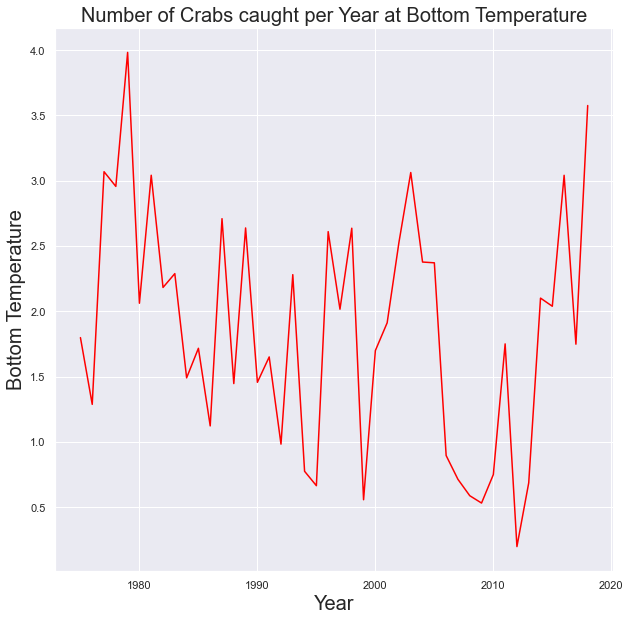

<Figure size 720x720 with 0 Axes>

In [39]:
new_data.mean_bottomtemp.plot(color = 'red')
plt.title('Number of Crabs caught per Year at Bottom Temperature', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Bottom Temperature', fontsize = 20)
plt.show()
plt.savefig('/Users/macbookair/Documents/Institute of data/Number of Crabs caught per Year at Bottom Temperature.png', dpi=300, bbox_inches='tight')


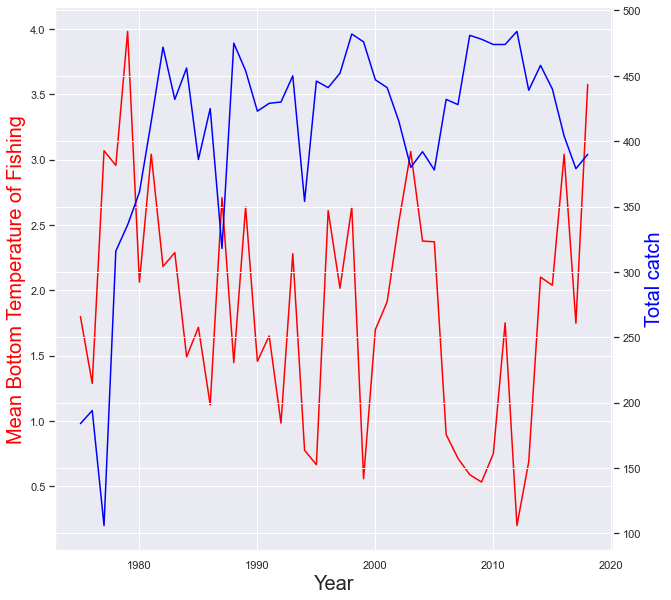

In [40]:
fig, ax = plt.subplots(figsize=(10,10)) 
ax1 = ax.twinx()
ax.set_xlabel("Year", fontsize = 20)

ax.set_ylabel("Mean Bottom Temperature of Fishing", fontsize = 20)
ax1.set_ylabel("Total catch", fontsize = 20)

p1, = ax.plot(new_data.mean_bottomtemp,color='red', label="Mean Bottom Temperature of Fishing")
p2, = ax1.plot(new_data.total_catch, color='blue', label="Total catch")

ax.yaxis.label.set_color('red')
ax1.yaxis.label.set_color('blue')
plt.savefig('/Users/macbookair/Documents/Institute of data/Number of Crabs caught per Year at Bottom Temperature.png', dpi=300, bbox_inches='tight')


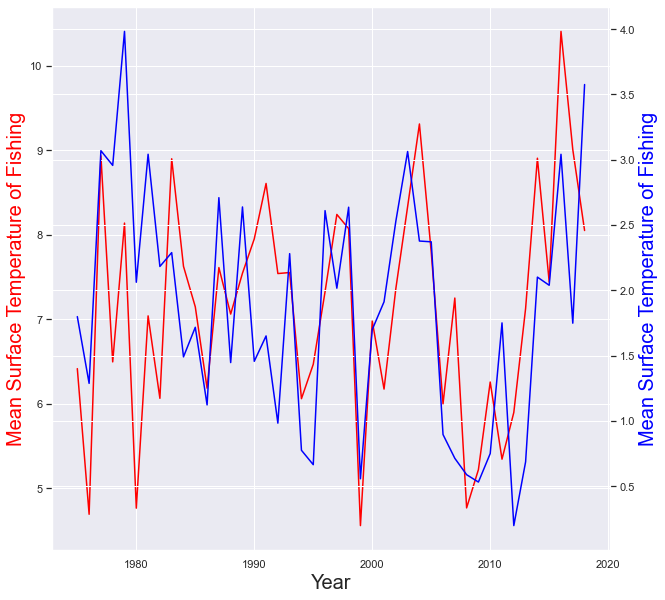

In [41]:
fig, ax = plt.subplots(figsize=(10,10)) 
ax1 = ax.twinx()
ax.set_xlabel("Year", fontsize = 20)

ax.set_ylabel("Mean Surface Temperature of Fishing", fontsize = 20)
ax1.set_ylabel("Mean Surface Temperature of Fishing", fontsize = 20)

p1, = ax.plot(new_data.mean_surfacetemp,color='red', label="Mean Surface Temperature of Fishing")
p2, = ax1.plot(new_data.mean_bottomtemp, color='blue', label="Mean Bottom Temperature of Fishing")

ax.yaxis.label.set_color('red')
ax1.yaxis.label.set_color('blue')
plt.savefig('/Users/macbookair/Documents/Institute of data/Surface temperature per Year at Bottom Temperature.png', dpi=300, bbox_inches='tight')


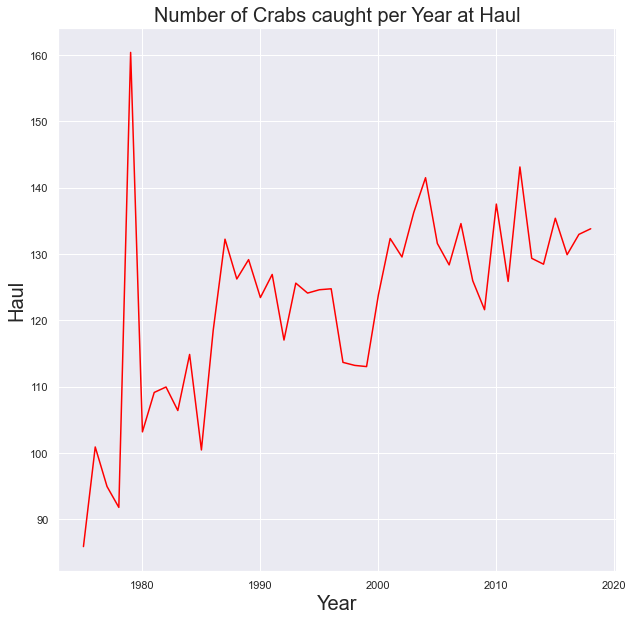

In [42]:
new_data.mean_haul.plot(color = 'red')
plt.title('Number of Crabs caught per Year at Haul', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Haul', fontsize = 20)
plt.savefig('/Users/macbookair/Documents/Institute of data/Number of Crabs caught per Year at Haul.png', dpi=300, bbox_inches='tight')


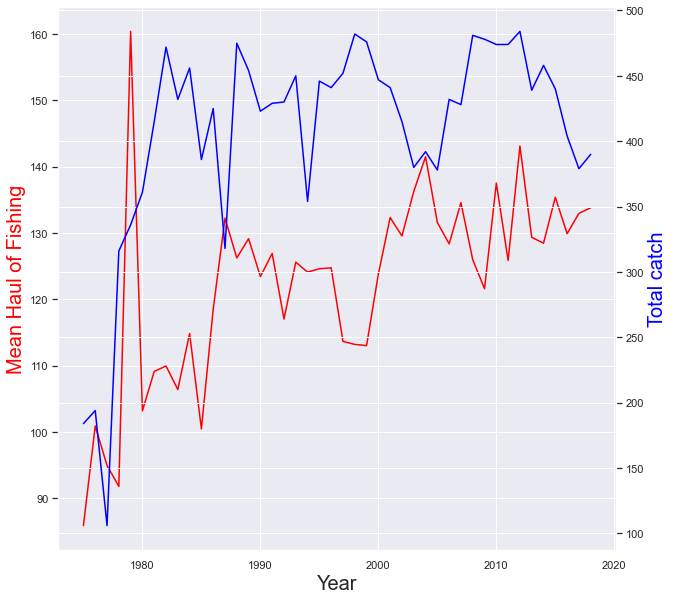

In [43]:
fig, ax = plt.subplots(figsize=(10,10)) 
ax1 = ax.twinx()
ax.set_xlabel("Year", fontsize = 20)

ax.set_ylabel("Mean Haul of Fishing", fontsize = 20)
ax1.set_ylabel("Total catch", fontsize = 20)

p1, = ax.plot(new_data.mean_haul,color='red', label="Mean Haul of Fishing")
p2, = ax1.plot(new_data.total_catch, color='blue', label="Total catch")

ax.yaxis.label.set_color('red')
ax1.yaxis.label.set_color('blue')

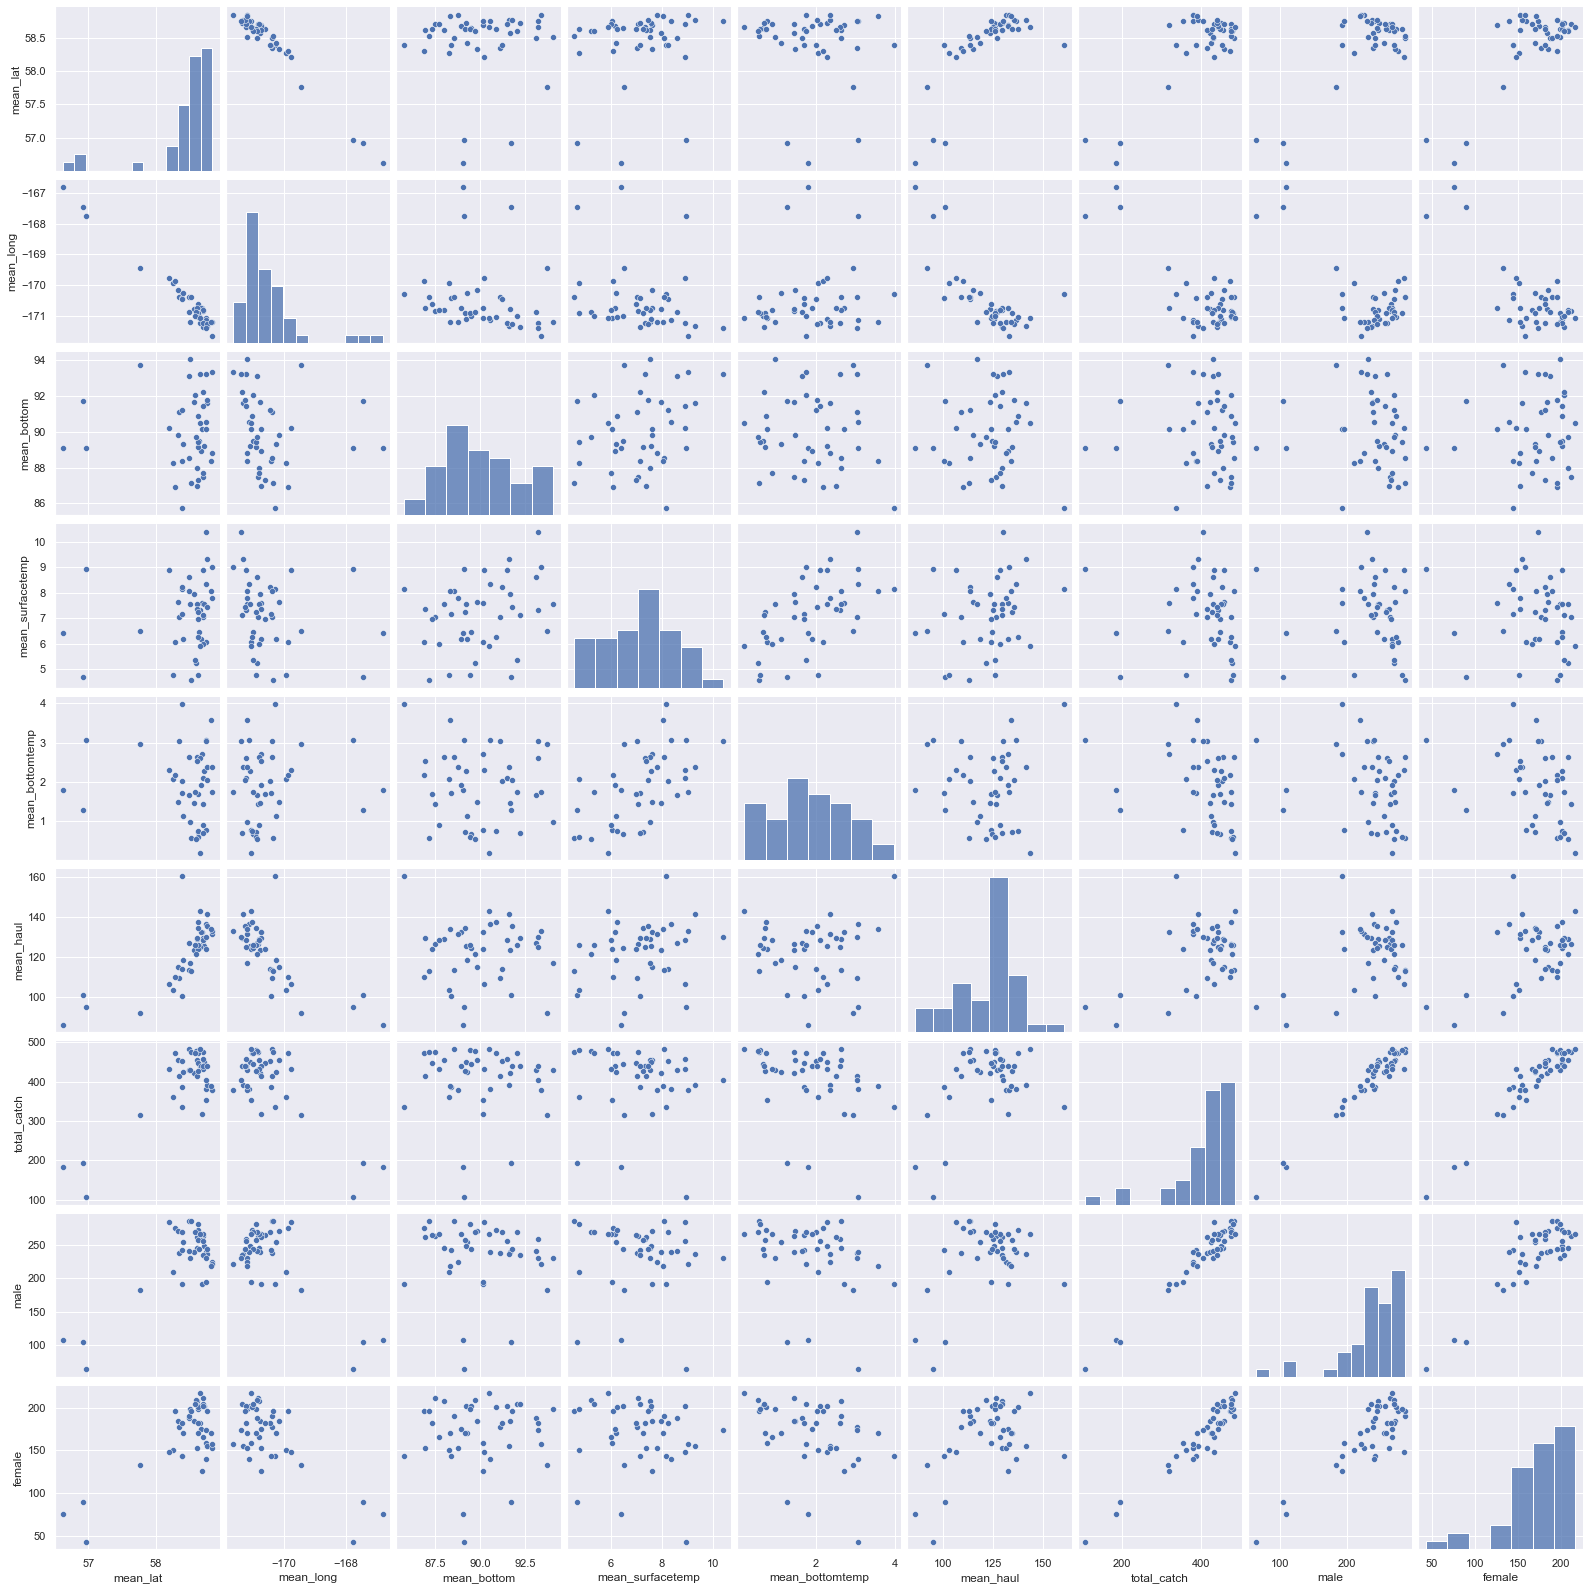

In [44]:
sns.pairplot(new_data)

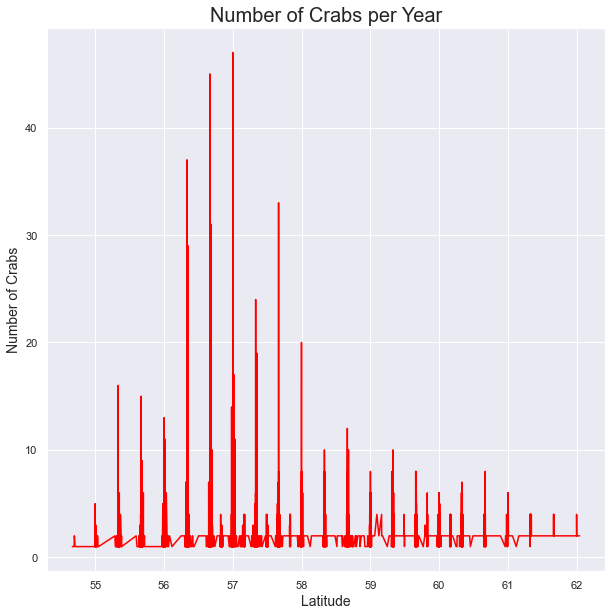

In [45]:
df.groupby(df.latitude).size().plot(color = 'red');
plt.title('Number of Crabs per Year', fontsize = 20)
plt.xlabel('Latitude', fontsize = 14)
plt.ylabel('Number of Crabs', fontsize = 14)
plt.savefig('/Users/macbookair/Documents/Institute of data/Number of Crabs per Year vs latitude.png', dpi=300, bbox_inches='tight')


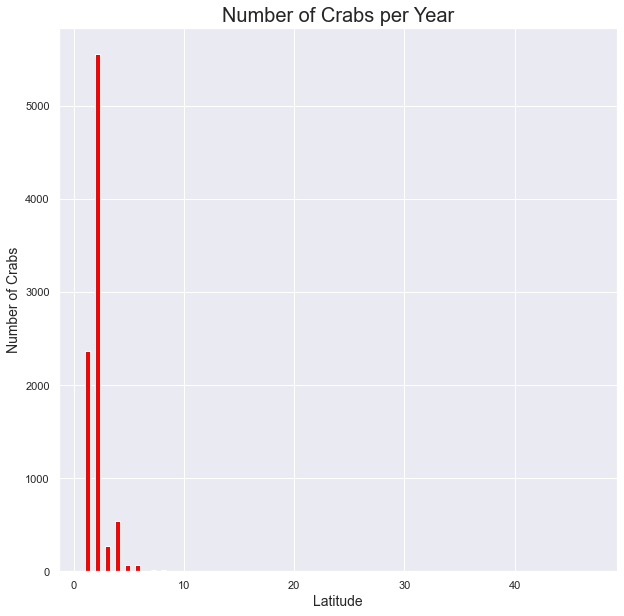

<Figure size 720x720 with 0 Axes>

In [46]:
df.groupby(df.latitude).size().plot.hist(color = 'red', bins = 100);
plt.title('Number of Crabs per Year', fontsize = 20)
plt.xlabel('Latitude', fontsize = 14)
plt.ylabel('Number of Crabs', fontsize = 14)
plt.show()
plt.savefig('/Users/macbookair/Documents/Institute of data/Number of Crabs per Year vs latitude hist.png', dpi=300, bbox_inches='tight')


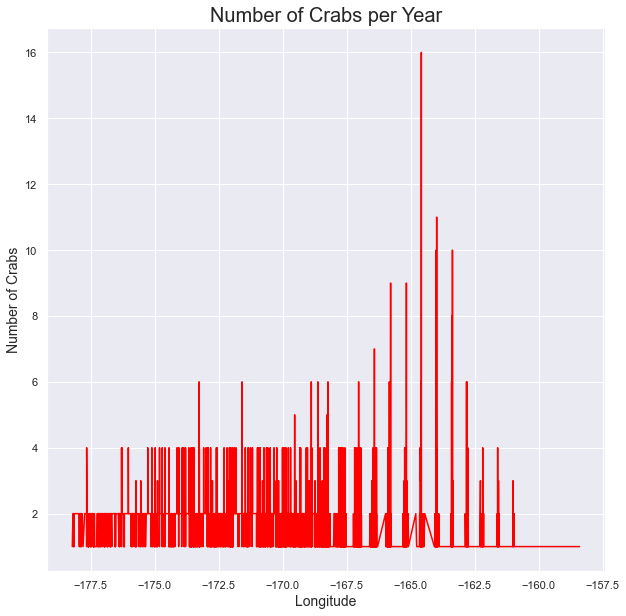

In [47]:
df.groupby(df.longitude).size().plot(color = 'red');
plt.title('Number of Crabs per Year', fontsize = 20)
plt.xlabel('Longitude', fontsize = 14)
plt.ylabel('Number of Crabs', fontsize = 14)
plt.savefig('/Users/macbookair/Documents/Institute of data/Number of Crabs per Year vs longitude.png', dpi=300, bbox_inches='tight')


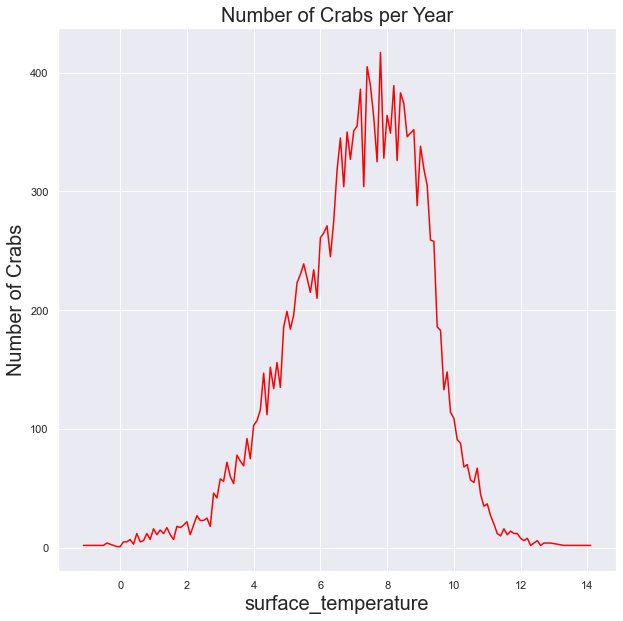

In [48]:
df.groupby(df.surface_temperature).size().plot(color = 'red');
plt.title('Number of Crabs per Year', fontsize = 20)
plt.xlabel('surface_temperature', fontsize = 20)
plt.ylabel('Number of Crabs', fontsize = 20)
plt.savefig('/Users/macbookair/Documents/Institute of data/Number of Crabs per Year vs surface temperature.png', dpi=300, bbox_inches='tight')


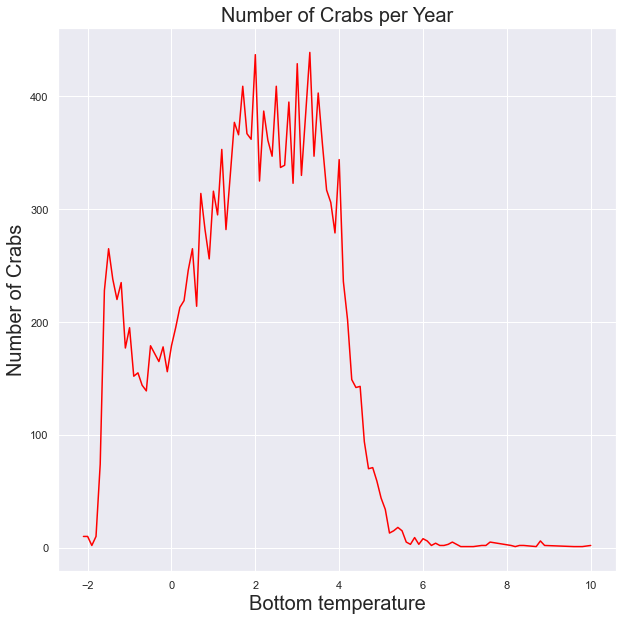

In [49]:
df.groupby(df.bottom_temperature).size().plot(color = 'red');
plt.title('Number of Crabs per Year', fontsize = 20)
plt.xlabel('Bottom temperature', fontsize = 20)
plt.ylabel('Number of Crabs', fontsize = 20)
plt.savefig('/Users/macbookair/Documents/Institute of data/Number of Crabs per Year vs bottom temperature.png', dpi=300, bbox_inches='tight')


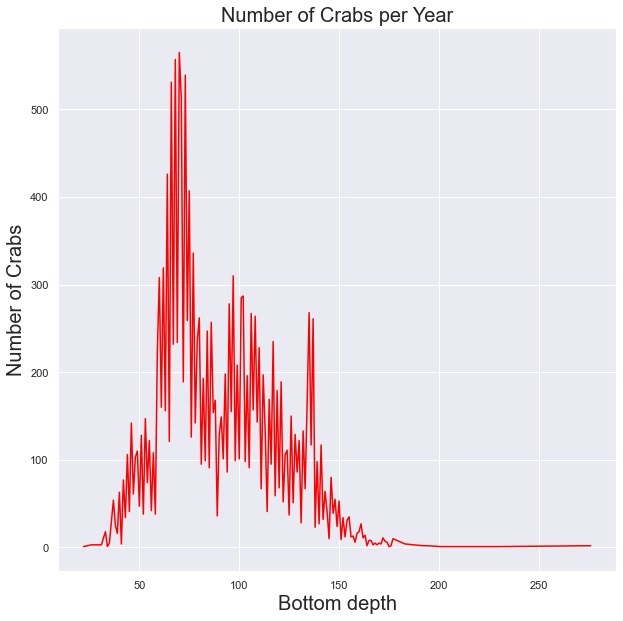

In [50]:
df.groupby(df.bottom_depth).size().plot(color = 'red');
plt.title('Number of Crabs per Year', fontsize = 20)
plt.xlabel('Bottom depth', fontsize = 20)
plt.ylabel('Number of Crabs', fontsize = 20)
plt.savefig('/Users/macbookair/Documents/Institute of data/Number of Crabs per Year vs Bottom Depth.png', dpi=300, bbox_inches='tight')


<h3> Geo spatial analysis of snow crab habitation </h3>
<p> Done for total snow crab population, male snow crab population and female snow crab population </p>


In [51]:
def generateBaseMap(default_location=[39, -173], default_zoom_start=5):
    '''
    Create a base map
    '''
    base_map = folium.Map(
        location = default_location
        , control_scale = True
        , zoom_start = default_zoom_start
    )
    
    return base_map

In [52]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [53]:
from folium.plugins import HeatMap
base_map = generateBaseMap(default_location = [56.90, -178.13])
df['count'] = 1

HeatMap(data = df[['latitude', 'longitude', 'count']].groupby(['latitude','longitude']).sum().reset_index().values.tolist(), radius = 15, max_zoom = 12).add_to(base_map)
display(base_map)        
              

In [54]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df[['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)

In [55]:
df_male = df[df['sex'] == 'male']
df_male.head()

id  latitude  longitude  year       name   sex  bottom_depth  \
0  147038  57.00000 -166.45000  1975  snow crab  male            71   
1  147037  57.00000 -167.08333  1975  snow crab  male            71   
2  147036  57.00000 -167.68333  1975  snow crab  male            75   
3  147035  56.66667 -172.56667  1975  snow crab  male           132   
4  147034  56.66667 -171.96667  1975  snow crab  male           123   

   surface_temperature  bottom_temperature  haul    cpue  count  
0                  9.1                 1.1   117   40356      1  
1                  8.7                 1.4   118   68691      1  
2                  8.8                 1.6   139  119748      1  
3                  6.1                 2.5    89    7882      1  
4                  5.7                 2.1    90   11258      1

In [56]:
base_map = generateBaseMap(default_location = [56.90, -178.13])
df['count'] = 1

HeatMap(data = df_male[['latitude', 'longitude', 'count']].groupby(['latitude','longitude']).sum().reset_index().values.tolist(), radius = 15, max_zoom = 12).add_to(base_map)
display(base_map)    

In [57]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_male[['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)

In [58]:
df_female = df[df['sex'] == 'female']
df_female.head()

id  latitude  longitude  year       name     sex  bottom_depth  \
71  171038  57.33333 -167.71667  1975  snow crab  female            71   
78  171037  57.00000 -172.03333  1975  snow crab  female           113   
79  171036  57.00000 -171.40000  1975  snow crab  female           104   
80  171035  57.00000 -170.80000  1975  snow crab  female            95   
81  171034  57.03333 -170.25000  1975  snow crab  female            66   

    surface_temperature  bottom_temperature  haul    cpue  count  
71                  9.0                 1.6   138  345451      1  
78                  5.1                 1.5    87   16644      1  
79                  5.5                 1.8    84   81901      1  
80                  5.4                 3.3    82     622      1  
81                  4.2                 2.0    81    1727      1

In [59]:
base_map = generateBaseMap(default_location = [56.90, -178.13])
df['count'] = 1

HeatMap(data = df_female[['latitude', 'longitude', 'count']].groupby(['latitude','longitude']).sum().reset_index().values.tolist(), radius = 15, max_zoom = 12).add_to(base_map)
display(base_map)    

In [60]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_female[['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)

In [61]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df[df['year'] == 1975][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/total_1975.html")

In [62]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df[df['year'] == 1976][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/total_1976.html")

In [63]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df[df['year'] == 1977][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/total_1977.html")

In [64]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df[df['year'] == 1978][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/total_1978.html")

In [65]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df[df['year'] == 1979][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/total_1979.html")

In [66]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df[df['year'] == 1980][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/total_1980.html")

In [67]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df[df['year'] == 1981][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/total_1981.html")

In [68]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df[df['year'] == 1982][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/total_1982.html")

In [69]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df[df['year'] == 1983][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/total_1983.html")

In [70]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df[df['year'] == 1984][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/total_1984.html")

In [71]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df[df['year'] == 1985][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/total_1985.html")

In [72]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df[df['year'] == 1986][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/total_1986.html")

In [73]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df[df['year'] == 1987][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/total_1987.html")

In [74]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df[df['year'] == 1988][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/total_1988.html")

In [75]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df[df['year'] == 1989][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/total_1989.html")

In [76]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df[df['year'] == 1990][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/total_1990.html")

In [77]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df[df['year'] == 1991][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/total_1991.html")

In [78]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df[df['year'] == 1992][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/total_1992.html")

In [79]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df[df['year'] == 1993][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/total_1993.html")

In [80]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df[df['year'] == 1994][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/total_1994.html")

In [81]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df[df['year'] == 1995][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/total_1995.html")

In [82]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df[df['year'] == 1996][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/total_1996.html")

In [83]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df[df['year'] == 1997][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/total_1997.html")

In [84]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df[df['year'] == 1998][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/total_1998.html")

In [85]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df[df['year'] == 1999][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/total_1999.html")

In [86]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df[df['year'] == 2000][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/total_2000.html")

In [87]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df[df['year'] == 2001][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/total_2001.html")

In [88]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df[df['year'] == 2002][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/total_2002.html")

In [89]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df[df['year'] == 2003][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/total_2003.html")

In [90]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df[df['year'] == 2004][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/total_2004.html")

In [91]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df[df['year'] == 2005][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/total_2005.html")

In [92]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df[df['year'] == 2006][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/total_2006.html")

In [93]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df[df['year'] == 2007][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/total_2007.html")

In [94]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df[df['year'] == 2008][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/total_2008.html")

In [95]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df[df['year'] == 2009][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/total_2009.html")

In [96]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df[df['year'] == 2010][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/total_2010.html")

In [97]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df[df['year'] == 2011][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/total_2011.html")

In [98]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df[df['year'] == 2012][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/total_2012.html")

In [99]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df[df['year'] == 2013][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/total_2013.html")

In [100]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df[df['year'] == 2014][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/total_2014.html")

In [101]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df[df['year'] == 2015][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/total_2015.html")

In [102]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df[df['year'] == 2016][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/total_2016.html")

In [103]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df[df['year'] == 2017][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/total_2017.html")

In [104]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df[df['year'] == 2018][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/total_2018.html")

In [105]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df[df['year'] == 2018][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/total_2018.html")

In [106]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_male[df['year'] == 1975][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/male_1975.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/4087181378.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_male[df['year'] == 1975][['latitude', 'longitude']]


In [107]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_male[df['year'] == 1976][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/male_1976.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/4006645633.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_male[df['year'] == 1976][['latitude', 'longitude']]


In [108]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_male[df['year'] == 1977][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/male_1977.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/3048687089.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_male[df['year'] == 1977][['latitude', 'longitude']]


In [109]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_male[df['year'] == 1978][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/male_1978.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/3362236128.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_male[df['year'] == 1978][['latitude', 'longitude']]


In [110]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_male[df['year'] == 1979][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/male_1979.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/1304486578.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_male[df['year'] == 1979][['latitude', 'longitude']]


In [111]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_male[df['year'] == 1980][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/male_1980.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/1820862078.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_male[df['year'] == 1980][['latitude', 'longitude']]


In [112]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_male[df['year'] == 1981][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/male_1981.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/2559279458.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_male[df['year'] == 1981][['latitude', 'longitude']]


In [113]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_male[df['year'] == 1982][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/male_1982.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/348472261.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_male[df['year'] == 1982][['latitude', 'longitude']]


In [114]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_male[df['year'] == 1983][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/male_1983.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/2656938879.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_male[df['year'] == 1983][['latitude', 'longitude']]


In [115]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_male[df['year'] == 1984][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/male_1984.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/3460200188.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_male[df['year'] == 1984][['latitude', 'longitude']]


In [116]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_male[df['year'] == 1985][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/male_1985.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/1951575543.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_male[df['year'] == 1985][['latitude', 'longitude']]


In [117]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_male[df['year'] == 1986][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/male_1986.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/174849157.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_male[df['year'] == 1986][['latitude', 'longitude']]


In [118]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_male[df['year'] == 1987][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/male_1987.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/1573028796.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_male[df['year'] == 1987][['latitude', 'longitude']]


In [119]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_male[df['year'] == 1988][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/male_1988.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/2128083109.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_male[df['year'] == 1988][['latitude', 'longitude']]


In [120]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_male[df['year'] == 1989][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/male_1989.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/824429525.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_male[df['year'] == 1989][['latitude', 'longitude']]


In [121]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_male[df['year'] == 1990][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/male_1990.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/4001303938.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_male[df['year'] == 1990][['latitude', 'longitude']]


In [122]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_male[df['year'] == 1991][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/male_1991.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/1954225296.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_male[df['year'] == 1991][['latitude', 'longitude']]


In [123]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_male[df['year'] == 1992][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/male_1992.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/738333478.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_male[df['year'] == 1992][['latitude', 'longitude']]


In [124]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_male[df['year'] == 1993][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/male_1993.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/3505245464.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_male[df['year'] == 1993][['latitude', 'longitude']]


In [125]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_male[df['year'] == 1994][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/male_1994.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/386003660.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_male[df['year'] == 1994][['latitude', 'longitude']]


In [126]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_male[df['year'] == 1995][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/male_1995.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/4248338265.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_male[df['year'] == 1995][['latitude', 'longitude']]


In [127]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_male[df['year'] == 1996][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/male_1996.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/1489136880.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_male[df['year'] == 1996][['latitude', 'longitude']]


In [128]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_male[df['year'] == 1997][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/male_1997.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/1199807078.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_male[df['year'] == 1997][['latitude', 'longitude']]


In [129]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_male[df['year'] == 1998][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/male_1998.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/2050116884.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_male[df['year'] == 1998][['latitude', 'longitude']]


In [130]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_male[df['year'] == 1999][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/male_1999.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/1175369787.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_male[df['year'] == 1999][['latitude', 'longitude']]


In [131]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_male[df['year'] == 2000][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/male_2000.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/3130479466.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_male[df['year'] == 2000][['latitude', 'longitude']]


In [132]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_male[df['year'] == 2001][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/male_2001.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/3549911346.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_male[df['year'] == 2001][['latitude', 'longitude']]


In [133]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_male[df['year'] == 2002][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/male_2002.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/2069771864.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_male[df['year'] == 2002][['latitude', 'longitude']]


In [134]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_male[df['year'] == 2003][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/male_2003.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/2211161173.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_male[df['year'] == 2003][['latitude', 'longitude']]


In [135]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_male[df['year'] == 2004][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/male_2004.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/2545288701.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_male[df['year'] == 2004][['latitude', 'longitude']]


In [136]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_male[df['year'] == 2005][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/male_2005.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/3360413300.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_male[df['year'] == 2005][['latitude', 'longitude']]


In [137]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_male[df['year'] == 2006][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/male_2006.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/2127730347.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_male[df['year'] == 2006][['latitude', 'longitude']]


In [138]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_male[df['year'] == 2007][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/male_2007.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/2738302220.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_male[df['year'] == 2007][['latitude', 'longitude']]


In [139]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_male[df['year'] == 2008][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/male_2008.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/1798348081.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_male[df['year'] == 2008][['latitude', 'longitude']]


In [140]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_male[df['year'] == 2009][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/male_2009.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/2455864956.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_male[df['year'] == 2009][['latitude', 'longitude']]


In [141]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_male[df['year'] == 2010][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/male_2010.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/1155169349.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_male[df['year'] == 2010][['latitude', 'longitude']]


In [142]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_male[df['year'] == 2011][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/male_2011.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/734674812.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_male[df['year'] == 2011][['latitude', 'longitude']]


In [143]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_male[df['year'] == 2012][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/male_2012.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/153245302.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_male[df['year'] == 2012][['latitude', 'longitude']]


In [144]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_male[df['year'] == 2013][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/male_2013.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/2369472578.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_male[df['year'] == 2013][['latitude', 'longitude']]


In [145]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_male[df['year'] == 2014][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/male_2014.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/150007148.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_male[df['year'] == 2014][['latitude', 'longitude']]


In [146]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_male[df['year'] == 2015][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/male_2015.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/839808844.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_male[df['year'] == 2015][['latitude', 'longitude']]


In [147]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_male[df['year'] == 2016][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/male_2016.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/3820206880.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_male[df['year'] == 2016][['latitude', 'longitude']]


In [148]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_male[df['year'] == 2017][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/male_2017.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/2492041514.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_male[df['year'] == 2017][['latitude', 'longitude']]


In [149]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_male[df['year'] == 2018][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/male_2018.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/2897931234.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_male[df['year'] == 2018][['latitude', 'longitude']]


In [150]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_female[df['year'] == 1975][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/female_1975.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/3530573153.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_female[df['year'] == 1975][['latitude', 'longitude']]


In [151]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_female[df['year'] == 1976][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/female_1976.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/564434533.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_female[df['year'] == 1976][['latitude', 'longitude']]


In [152]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_female[df['year'] == 1977][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/female_1977.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/2868207599.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_female[df['year'] == 1977][['latitude', 'longitude']]


In [153]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_female[df['year'] == 1978][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/female_1978.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/1473483736.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_female[df['year'] == 1978][['latitude', 'longitude']]


In [154]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_female[df['year'] == 1979][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/female_1979.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/3338548523.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_female[df['year'] == 1979][['latitude', 'longitude']]


In [155]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_female[df['year'] == 1980][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/female_1980.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/838064058.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_female[df['year'] == 1980][['latitude', 'longitude']]


In [156]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_female[df['year'] == 1981][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/female_1981.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/2096316313.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_female[df['year'] == 1981][['latitude', 'longitude']]


In [157]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_female[df['year'] == 1982][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/female_1982.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/4159158537.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_female[df['year'] == 1982][['latitude', 'longitude']]


In [158]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_female[df['year'] == 1983][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/female_1983.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/325010834.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_female[df['year'] == 1983][['latitude', 'longitude']]


In [159]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_female[df['year'] == 1984][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/female_1984.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/482967839.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_female[df['year'] == 1984][['latitude', 'longitude']]


In [160]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_female[df['year'] == 1985][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/female_1985.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/278881288.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_female[df['year'] == 1985][['latitude', 'longitude']]


In [161]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_female[df['year'] == 1986][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/female_1986.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/2545836674.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_female[df['year'] == 1986][['latitude', 'longitude']]


In [162]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_female[df['year'] == 1987][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/female_1987.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/3233071978.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_female[df['year'] == 1987][['latitude', 'longitude']]


In [163]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_female[df['year'] == 1988][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/female_1988.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/989699524.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_female[df['year'] == 1988][['latitude', 'longitude']]


In [164]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_female[df['year'] == 1989][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/female_1989.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/3991939743.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_female[df['year'] == 1989][['latitude', 'longitude']]


In [165]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_female[df['year'] == 1990][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/female_1990.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/4126421755.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_female[df['year'] == 1990][['latitude', 'longitude']]


In [166]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_female[df['year'] == 1991][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/female_1991.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/2200575727.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_female[df['year'] == 1991][['latitude', 'longitude']]


In [167]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_female[df['year'] == 1992][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/female_1992.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/57688793.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_female[df['year'] == 1992][['latitude', 'longitude']]


In [168]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_female[df['year'] == 1993][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/female_1993.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/393866931.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_female[df['year'] == 1993][['latitude', 'longitude']]


In [169]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_female[df['year'] == 1994][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/female_1994.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/1138460873.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_female[df['year'] == 1994][['latitude', 'longitude']]


In [170]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_female[df['year'] == 1995][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/female_1995.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/603039751.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_female[df['year'] == 1995][['latitude', 'longitude']]


In [171]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_female[df['year'] == 1996][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/female_1996.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/3903617969.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_female[df['year'] == 1996][['latitude', 'longitude']]


In [172]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_female[df['year'] == 1997][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/female_1997.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/4257189496.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_female[df['year'] == 1997][['latitude', 'longitude']]


In [173]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_female[df['year'] == 1998][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/female_1998.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/974649917.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_female[df['year'] == 1998][['latitude', 'longitude']]


In [174]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_female[df['year'] == 1999][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/female_1999.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/5145963.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_female[df['year'] == 1999][['latitude', 'longitude']]


In [175]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_female[df['year'] == 2000][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/female_2000.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/2829944410.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_female[df['year'] == 2000][['latitude', 'longitude']]


In [176]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_female[df['year'] == 2001][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/female_2001.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/2026128555.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_female[df['year'] == 2001][['latitude', 'longitude']]


In [177]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_female[df['year'] == 2002][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/female_2002.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/3635096559.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_female[df['year'] == 2002][['latitude', 'longitude']]


In [178]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_female[df['year'] == 2003][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/female_2003.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/2782633000.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_female[df['year'] == 2003][['latitude', 'longitude']]


In [179]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_female[df['year'] == 2004][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/female_2004.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/4212287824.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_female[df['year'] == 2004][['latitude', 'longitude']]


In [180]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_female[df['year'] == 2005][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/female_2005.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/434861114.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_female[df['year'] == 2005][['latitude', 'longitude']]


In [181]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_female[df['year'] == 2006][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/female_2006.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/350110227.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_female[df['year'] == 2006][['latitude', 'longitude']]


In [182]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_female[df['year'] == 2007][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/female_2007.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/539038264.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_female[df['year'] == 2007][['latitude', 'longitude']]


In [183]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_female[df['year'] == 2008][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/female_2008.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/3509780185.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_female[df['year'] == 2008][['latitude', 'longitude']]


In [184]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_female[df['year'] == 2009][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/female_2009.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/794046926.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_female[df['year'] == 2009][['latitude', 'longitude']]


In [185]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_female[df['year'] == 2010][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/female_2010.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/213890650.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_female[df['year'] == 2010][['latitude', 'longitude']]


In [186]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_female[df['year'] == 2011][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/female_2011.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/871783370.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_female[df['year'] == 2011][['latitude', 'longitude']]


In [187]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_female[df['year'] == 2012][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/female_2012.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/2349805493.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_female[df['year'] == 2012][['latitude', 'longitude']]


In [188]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_female[df['year'] == 2013][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/female_2013.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/1347728852.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_female[df['year'] == 2013][['latitude', 'longitude']]


In [189]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_female[df['year'] == 2014][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/female_2014.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/2425906675.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_female[df['year'] == 2014][['latitude', 'longitude']]


In [190]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_female[df['year'] == 2015][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/female_2015.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/2392381688.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_female[df['year'] == 2015][['latitude', 'longitude']]


In [191]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_female[df['year'] == 2016][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/female_2016.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/4149038448.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_female[df['year'] == 2016][['latitude', 'longitude']]


In [192]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_female[df['year'] == 2017][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/female_2017.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/2077507532.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_female[df['year'] == 2017][['latitude', 'longitude']]


In [193]:
base_map = generateBaseMap(default_location=[56.90, -178.13])
heat_map = df_female[df['year'] == 2018][['latitude', 'longitude']]
heat_map = [[row['latitude'], row['longitude']] for index, row in heat_map.iterrows()]
HeatMap(heat_map).add_to(base_map)
display(base_map)
base_map.save("/Users/macbookair/Documents/Institute of data/Maps/female_2018.html")

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_33477/3541686481.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map = df_female[df['year'] == 2018][['latitude', 'longitude']]


In [194]:
new_data.head()

mean_lat   mean_long  mean_bottom  mean_surfacetemp  mean_bottomtemp  \
year                                                                          
1975  56.619747 -166.820289    89.070652          6.415761         1.798370   
1976  56.917268 -167.464347    91.701031          4.692268         1.287113   
1977  56.961005 -167.772012    89.122642          8.933962         3.068868   
1978  57.761178 -169.434204    93.705696          6.495570         2.956329   
1979  58.391326 -170.266240    85.755952          8.138095         3.982440   

       mean_haul  total_catch  male  female  
year                                         
1975   85.907609          184   108      76  
1976  100.922680          194   104      90  
1977   94.962264          106    63      43  
1978   91.816456          316   183     133  
1979  160.395833          336   192     144

<AxesSubplot:xlabel='year', ylabel='total_catch'>

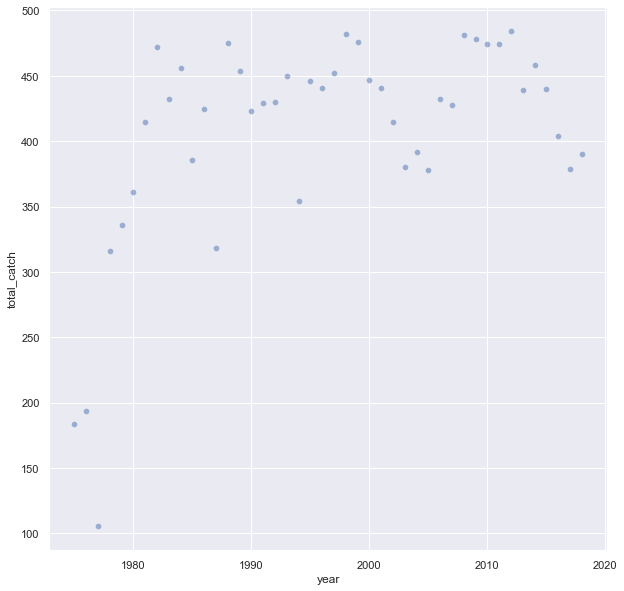

In [195]:
sns.scatterplot(x='year', y = 'total_catch', data = new_data, alpha = 0.5)

<AxesSubplot:xlabel='mean_lat', ylabel='total_catch'>

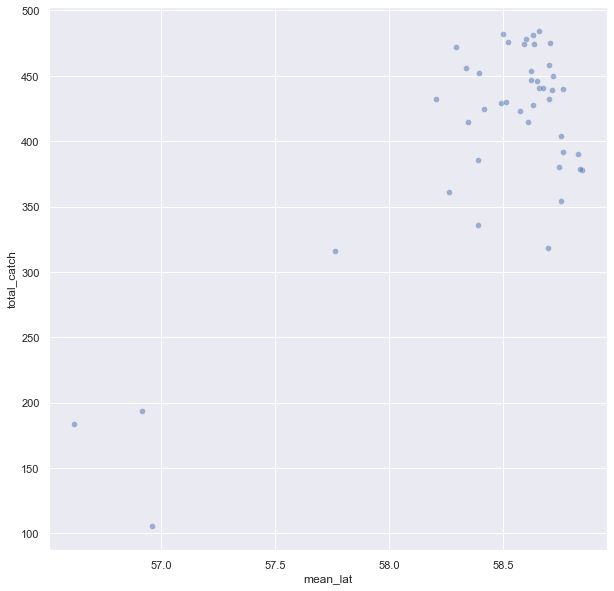

In [196]:
sns.scatterplot(x='mean_lat', y = 'total_catch', data = new_data, alpha = 0.5)

<AxesSubplot:xlabel='mean_long', ylabel='total_catch'>

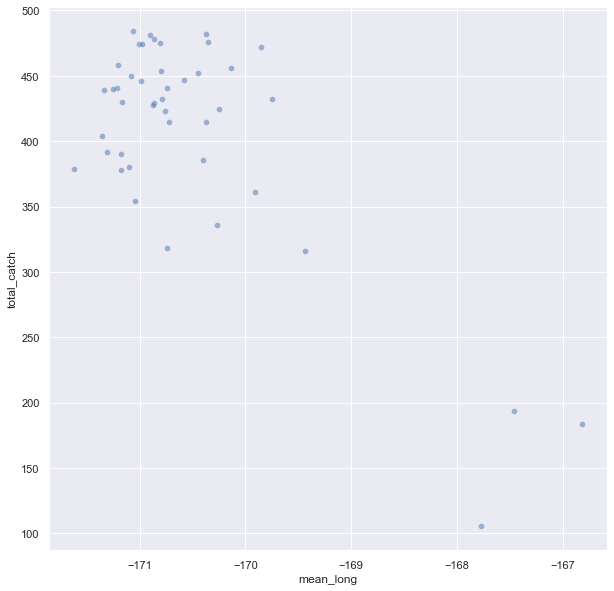

In [197]:
sns.scatterplot(x='mean_long', y = 'total_catch', data = new_data, alpha = 0.5)

<AxesSubplot:xlabel='mean_bottom', ylabel='total_catch'>

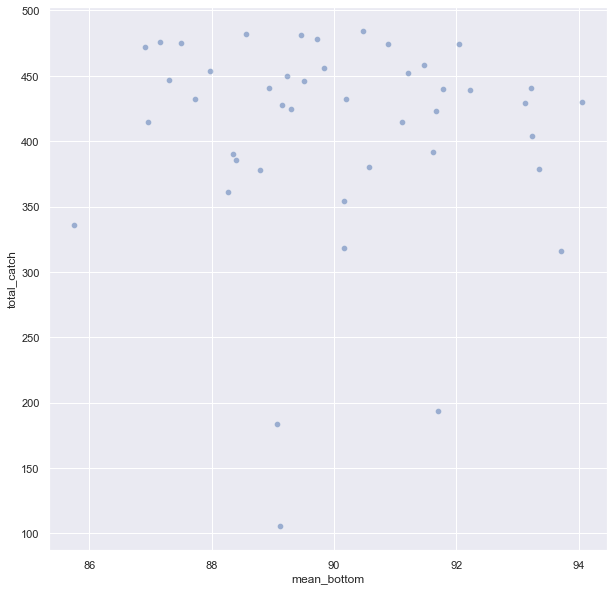

In [198]:
sns.scatterplot(x='mean_bottom', y = 'total_catch', data = new_data, alpha = 0.5)

<AxesSubplot:xlabel='mean_surfacetemp', ylabel='total_catch'>

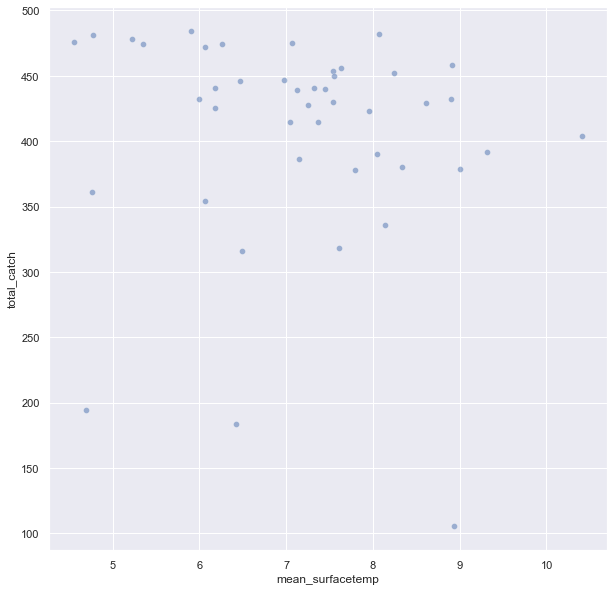

In [199]:
sns.scatterplot(x='mean_surfacetemp', y = 'total_catch', data = new_data, alpha = 0.5)

<AxesSubplot:xlabel='mean_bottomtemp', ylabel='total_catch'>

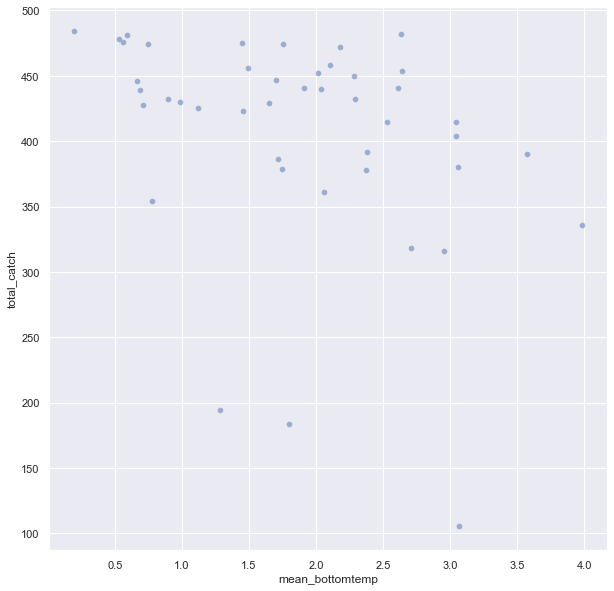

In [200]:
sns.scatterplot(x='mean_bottomtemp', y = 'total_catch', data = new_data, alpha = 0.5)

<AxesSubplot:xlabel='mean_haul', ylabel='total_catch'>

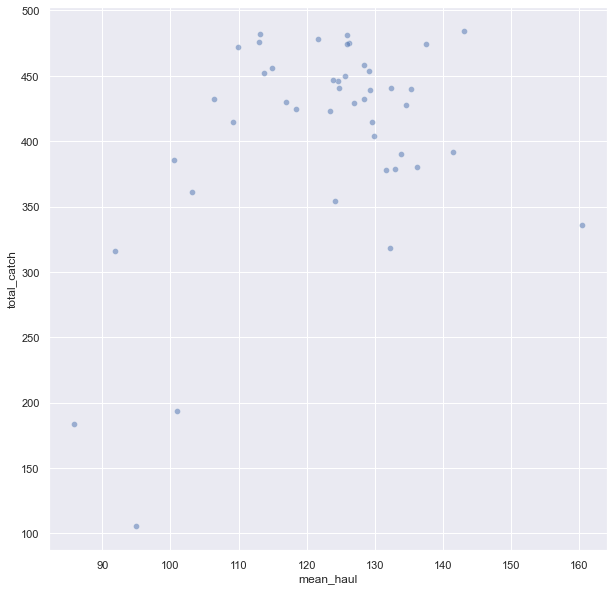

In [201]:
sns.scatterplot(x='mean_haul', y = 'total_catch', data = new_data, alpha = 0.5)

<h3> Male vs Female - EDA </h3>


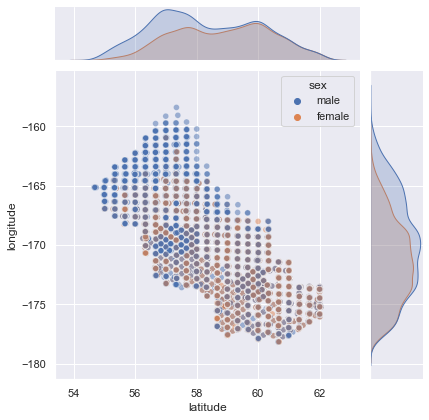

In [202]:
sns.jointplot(x = 'latitude', y='longitude', data = df, hue = 'sex', alpha = 0.5 )
#plt.title('Sepal Width Vs Sepal Length', fontsize = 20)
plt.xlabel('Latitude', fontsize = 20)
plt.ylabel('Longitude', fontsize = 20)
plt.savefig('/Users/macbookair/Documents/Institute of data/latlong sex.png', dpi=300, bbox_inches='tight')


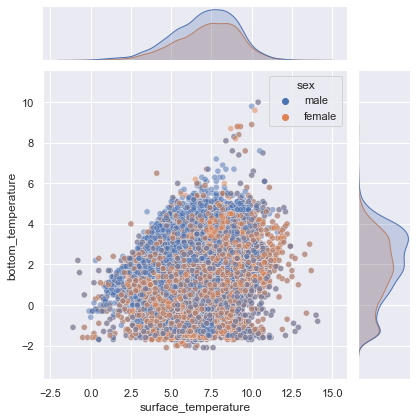

In [203]:
sns.jointplot(x = 'surface_temperature', y='bottom_temperature', data = df, hue = 'sex', alpha = 0.5 )
#plt.title('Sepal Width Vs Sepal Length', fontsize = 20)
plt.xlabel('Surface_temperature', fontsize = 14)
plt.ylabel('Bottom_temperature', fontsize = 14)
plt.savefig('/Users/macbookair/Documents/Institute of data/surface and bottom temp sex.png', dpi=300, bbox_inches='tight')


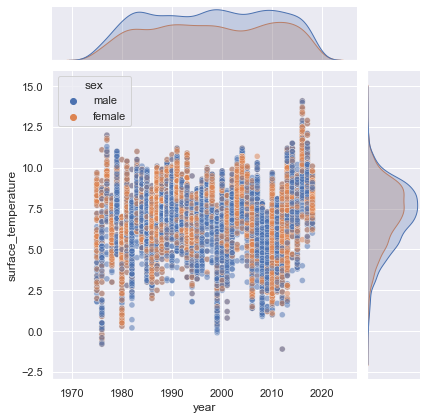

In [204]:
sns.jointplot(x = 'year', y='surface_temperature', data = df, hue = 'sex', alpha = 0.5 )
#plt.title('Sepal Width Vs Sepal Length', fontsize = 20)
plt.xlabel('year', fontsize = 14)
plt.ylabel('Surface_temperature', fontsize = 14)
plt.savefig('/Users/macbookair/Documents/Institute of data/Year vs surface temperature sex.png', dpi=300, bbox_inches='tight')


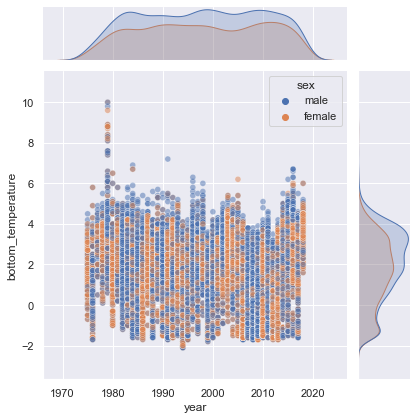

In [205]:
sns.jointplot(x = 'year', y='bottom_temperature', data = df, hue = 'sex', alpha = 0.5 )
#plt.title('Sepal Width Vs Sepal Length', fontsize = 20)
plt.xlabel('year', fontsize = 14)
plt.ylabel('Bottom_temperature', fontsize = 14)
plt.savefig('/Users/macbookair/Documents/Institute of data/Year vs bottom temperature sex.png', dpi=300, bbox_inches='tight')


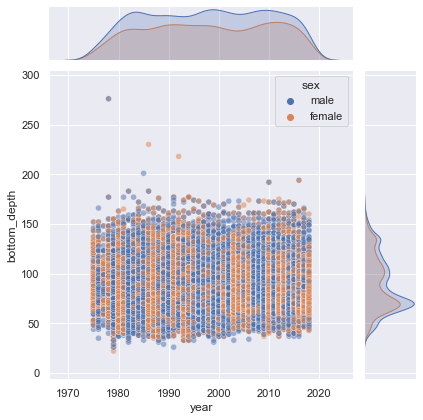

In [206]:
sns.jointplot(x = 'year', y='bottom_depth', data = df, hue = 'sex', alpha = 0.5 )
#plt.title('Sepal Width Vs Sepal Length', fontsize = 20)
plt.xlabel('year', fontsize = 14)
plt.ylabel('Surface_temperature', fontsize = 14)
plt.savefig('/Users/macbookair/Documents/Institute of data/Year vs bottom depth_sex.png', dpi=300, bbox_inches='tight')


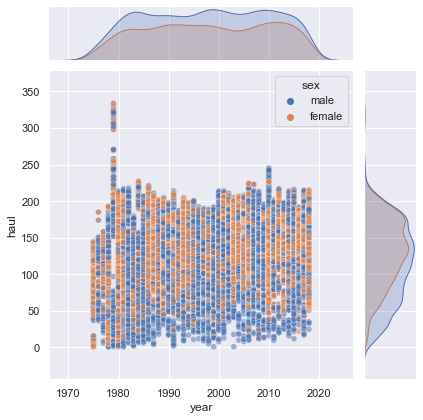

<Figure size 720x720 with 0 Axes>

In [207]:
sns.jointplot(x = 'year', y='haul', data = df, hue = 'sex', alpha = 0.5 )
#plt.title('Sepal Width Vs Sepal Length', fontsize = 20)
plt.xlabel('year', fontsize = 14)
plt.ylabel('Surface_temperature', fontsize = 14)
plt.show()
plt.savefig('/Users/macbookair/Documents/Institute of data/Year vs haul sex.png', dpi=300, bbox_inches='tight')


In [208]:
new_data.head()

mean_lat   mean_long  mean_bottom  mean_surfacetemp  mean_bottomtemp  \
year                                                                          
1975  56.619747 -166.820289    89.070652          6.415761         1.798370   
1976  56.917268 -167.464347    91.701031          4.692268         1.287113   
1977  56.961005 -167.772012    89.122642          8.933962         3.068868   
1978  57.761178 -169.434204    93.705696          6.495570         2.956329   
1979  58.391326 -170.266240    85.755952          8.138095         3.982440   

       mean_haul  total_catch  male  female  
year                                         
1975   85.907609          184   108      76  
1976  100.922680          194   104      90  
1977   94.962264          106    63      43  
1978   91.816456          316   183     133  
1979  160.395833          336   192     144

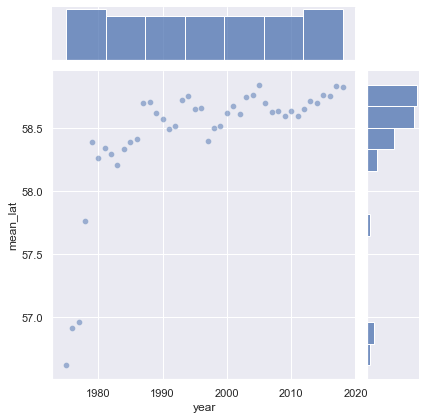

In [209]:
sns.jointplot(x = 'year', y='mean_lat', data = new_data, alpha = 0.5 )
#plt.title('Sepal Width Vs Sepal Length', fontsize = 20)
plt.xlabel('year', fontsize = 14)
plt.ylabel('Mean latitude', fontsize = 14)
plt.show()

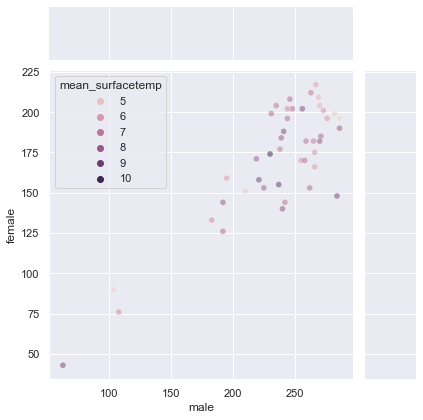

In [210]:
sns.jointplot(x = 'male', y='female', data = new_data, hue = 'mean_surfacetemp', alpha = 0.5 )
#plt.title('Sepal Width Vs Sepal Length', fontsize = 20)
plt.xlabel('year', fontsize = 14)
plt.ylabel('Mean latitude', fontsize = 14)
plt.show()

<h3> Effect of global warming on snow crab population </h3>


In [211]:
co2_df = pd.read_csv ("/Users/macbookair/Downloads/Global Statistics data/co2_emissions_tonnes_per_person.csv")

In [212]:
global_temp = pd.read_csv ("/Users/macbookair/Documents/Institute of data/NASA GLOBAL LAND-OCEAN TEMPERATURE INDEX.csv")

In [213]:
co2_df.head()

country  1800  1801  1802  1803  1804  1805  1806  1807  1808  ...  \
0  Afghanistan   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1      Albania   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2      Algeria   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
3      Andorra   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4       Angola   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

    2009  2010   2011   2012  2013   2014   2015   2016   2017   2018  
0  0.238  0.29  0.406  0.345  0.28  0.253  0.262  0.245  0.247  0.254  
1  1.470  1.56  1.790  1.690  1.69  1.900  1.600  1.570  1.610  1.590  
2  3.400  3.28  3.270  3.430  3.48  3.680  3.800  3.640  3.560  3.690  
3  6.120  6.12  5.870  5.920  5.90  5.830  5.970  6.070  6.270  6.120  
4  1.230  1.24  1.250  1.350  1.28  1.640  1.220  1.180  1.140  1.120  

[5 rows x 220 columns]

In [214]:
global_temp.head()

year  Annual_mean  Lowess(5)
0  1880        -0.16      -0.09
1  1881        -0.08      -0.13
2  1882        -0.11      -0.16
3  1883        -0.17      -0.20
4  1884        -0.28      -0.24

In [215]:
global_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         142 non-null    int64  
 1   Annual_mean  142 non-null    float64
 2   Lowess(5)    142 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 3.5 KB


In [216]:
co2_df_T = co2_df.T

In [217]:
co2_df_T.columns = co2_df_T.iloc[0]

In [218]:
co2_df_T.columns

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'United Kingdom', 'United States', 'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=192)

In [219]:
co2_df_T.loc['1975':'2018'].head()

country Afghanistan Albania Algeria Andorra Angola Antigua and Barbuda  \
1975          0.168    1.91    1.93     NaN  0.628                11.3   
1976          0.153    2.01    2.29     NaN  0.451                6.47   
1977          0.181    2.27    2.38     NaN  0.469                7.49   
1978          0.162    2.52    3.45     NaN  0.694                7.92   
1979          0.167    2.89    2.44     NaN  0.682                6.57   

country Argentina Armenia Australia Austria  ... United Kingdom United States  \
1975         3.67     5.3      12.8     7.1  ...           10.8          20.1   
1976          3.8     5.4      12.5    7.62  ...           10.7          20.9   
1977         3.78    5.48      13.3    7.34  ...           10.8          21.2   
1978         3.79    5.57      14.2    7.51  ...           10.8          21.7   
1979         4.03    5.52      14.2    8.06  ...           11.5          21.5   

country Uruguay Uzbekistan Vanuatu Venezuela Vietnam  Yemen Zambia Zimbabwe  
1975       2.11        6.6   0.551      4.84   0.447   0.32  0.825     1.32  
1976       2.07       6.66   0.427      4.22    0.28  0.368  0.787     1.67  
1977       1.98        6.7   0.483      4.56     0.3  0.415  0.707     1.38  
1978       1.99       6.74   0.536      4.78   0.296  0.419  0.635     1.34  
1979       2.16       6.61   0.554      5.18   0.306   0.42  0.636     1.32  

[5 rows x 192 columns]

In [220]:
us_co2 = pd.DataFrame(co2_df_T.loc['1975':'2018']['United States'])

In [221]:
us_co2.index.set_columns = 'year'

In [222]:
us_co2.columns

Index(['United States'], dtype='object')

In [223]:
us_co2_list = list(us_co2['United States'])

In [224]:
us_co2_list

[20.1,
 20.9,
 21.2,
 21.7,
 21.5,
 20.6,
 19.6,
 18.4,
 18.4,
 18.8,
 18.7,
 18.5,
 19.1,
 19.8,
 19.8,
 20.3,
 19.9,
 20.2,
 20.4,
 20.5,
 20.5,
 21.0,
 21.0,
 20.9,
 20.9,
 21.3,
 20.7,
 20.7,
 20.7,
 20.9,
 20.8,
 20.3,
 20.4,
 19.5,
 17.9,
 18.5,
 17.9,
 17.1,
 17.5,
 17.5,
 16.9,
 16.4,
 16.2,
 16.6]

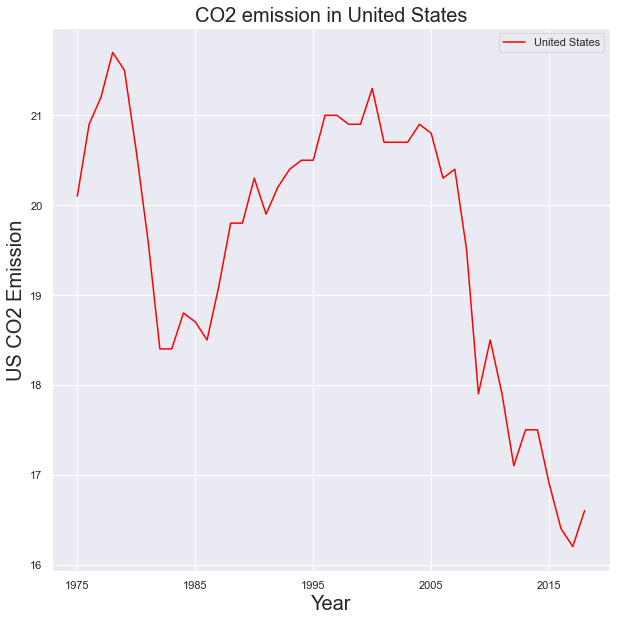

In [225]:
us_co2.plot(color = 'red')
plt.xlabel('Year', fontsize = 20)
plt.ylabel('US CO2 Emission', fontsize = 20)
plt.title('CO2 emission in United States', fontsize = 20)
plt.savefig('/Users/macbookair/Documents/Institute of data/US emissions.png', dpi=300, bbox_inches='tight')


In [226]:
global_temp.set_index('year', inplace = True)

In [227]:
global_temp_data1 = pd.DataFrame(global_temp.loc['1975':'2018'])

In [228]:
global_temp_data= pd.DataFrame(global_temp_data1.Annual_mean)

In [229]:
global_temp_data

Annual_mean
year             
1975        -0.01
1976        -0.10
1977         0.18
1978         0.07
1979         0.17
1980         0.26
1981         0.32
1982         0.14
1983         0.31
1984         0.16
1985         0.12
1986         0.18
1987         0.32
1988         0.39
1989         0.27
1990         0.45
1991         0.41
1992         0.22
1993         0.23
1994         0.32
1995         0.45
1996         0.33
1997         0.46
1998         0.61
1999         0.38
2000         0.39
2001         0.53
2002         0.63
2003         0.62
2004         0.53
2005         0.68
2006         0.63
2007         0.66
2008         0.54
2009         0.65
2010         0.72
2011         0.61
2012         0.64
2013         0.67
2014         0.74
2015         0.90
2016         1.02
2017         0.92
2018         0.85

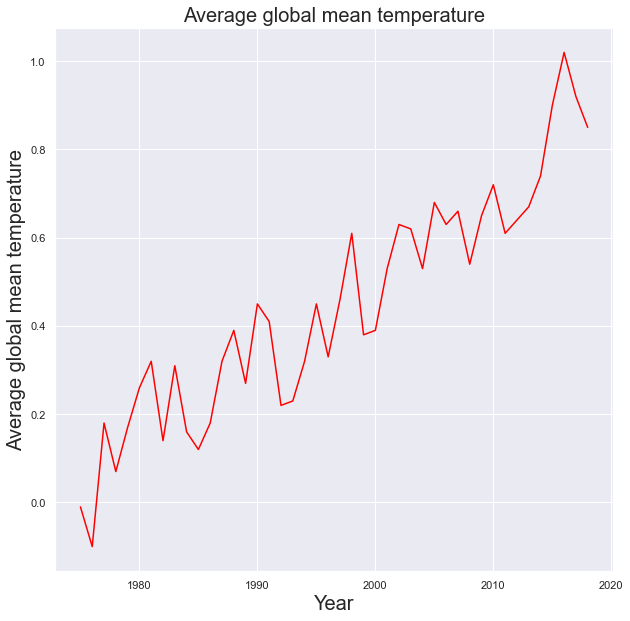

In [230]:
global_temp_data ['Annual_mean'].plot(color = 'red')
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Average global mean temperature', fontsize = 20)
plt.title('Average global mean temperature', fontsize = 20)
plt.savefig('/Users/macbookair/Documents/Institute of data/Average global mean temperature over the years.png', dpi=300, bbox_inches='tight')

In [231]:
us_co2.index

Index(['1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'],
      dtype='object')

In [232]:
result1 = pd.concat([new_data,global_temp_data], axis = 1)

In [233]:
result1

mean_lat   mean_long  mean_bottom  mean_surfacetemp  mean_bottomtemp  \
year                                                                          
1975  56.619747 -166.820289    89.070652          6.415761         1.798370   
1976  56.917268 -167.464347    91.701031          4.692268         1.287113   
1977  56.961005 -167.772012    89.122642          8.933962         3.068868   
1978  57.761178 -169.434204    93.705696          6.495570         2.956329   
1979  58.391326 -170.266240    85.755952          8.138095         3.982440   
1980  58.264156 -169.912170    88.263158          4.764543         2.061496   
1981  58.345468 -170.370261    91.113253          7.040000         3.041687   
1982  58.293300 -169.854522    86.911017          6.064407         2.182415   
1983  58.207071 -169.751339    90.199074          8.899074         2.288426   
1984  58.337036 -170.139871    89.835526          7.626535         1.490132   
1985  58.391257 -170.398670    88.396373          7.147150         1.716580   
1986  58.415579 -170.251084    89.296471          6.184235         1.122118   
1987  58.697577 -170.738331    90.163522          7.611635         2.709119   
1988  58.706362 -170.811950    87.492632          7.061263         1.446316   
1989  58.622121 -170.799732    87.969163          7.544714         2.638106   
1990  58.575092 -170.757807    91.669031          7.951300         1.456028   
1991  58.492514 -170.867591    93.118881          8.606993         1.650350   
1992  58.514792 -171.167015    94.048837          7.540930         0.982558   
1993  58.720269 -171.078600    89.233333          7.552889         2.280444   
1994  58.753976 -171.040724    90.166667          6.060169         0.774576   
1995  58.650148 -170.983029    89.502242          6.467040         0.664350   
1996  58.660099 -171.210388    93.217687          7.325170         2.609977   
1997  58.394666 -170.445421    91.216814          8.240265         2.015929   
1998  58.498721 -170.373393    88.558091          8.072407         2.636100   
1999  58.520652 -170.357139    87.147059          4.558403         0.556723   
2000  58.624586 -170.583848    87.304251          6.978747         1.699105   
2001  58.676780 -170.738479    88.929705          6.173696         1.911791   
2002  58.611573 -170.725449    86.956627          7.361687         2.528434   
2003  58.745930 -171.103922    90.571053          8.333684         3.062632   
2004  58.764622 -171.306351    91.619898          9.310969         2.377041   
2005  58.845723 -171.180709    88.793651          7.794974         2.371164   
2006  58.702909 -170.786532    87.724537          5.998843         0.895139   
2007  58.632293 -170.873600    89.142523          7.250935         0.713084   
2008  58.633622 -170.898556    89.455301          4.767568         0.587734   
2009  58.600365 -170.868762    89.719665          5.220293         0.531381   
2010  58.634967 -171.005926    90.879747          6.257384         0.749367   
2011  58.592957 -170.973624    92.050633          5.344304         1.750211   
2012  58.656216 -171.059903    90.471074          5.897107         0.197934   
2013  58.713335 -171.337617    92.230068          7.127335         0.686105   
2014  58.702955 -171.208736    91.467249          8.905677         2.100873   
2015  58.762980 -171.251110    91.786364          7.441591         2.038409   
2016  58.756270 -171.358747    93.230198         10.406188         3.041337   
2017  58.836459 -171.616244    93.353562          9.007388         1.748021   
2018  58.828547 -171.179935    88.353846          8.050256         3.575641   

       mean_haul  total_catch  male  female  Annual_mean  
year                                                      
1975   85.907609          184   108      76        -0.01  
1976  100.922680          194   104      90        -0.10  
1977   94.962264          106    63      43         0.18  
1978   91.816456          316   183     133         0.07  
1979  160.395833  

In [234]:
us_co2_emission = pd.DataFrame()
us_co2_emission['year'] = year_list
us_co2_emission['us_emission'] = us_co2_list

In [235]:
us_co2_emission.set_index('year')

us_emission
year             
1975         20.1
1976         20.9
1977         21.2
1978         21.7
1979         21.5
1980         20.6
1981         19.6
1982         18.4
1983         18.4
1984         18.8
1985         18.7
1986         18.5
1987         19.1
1988         19.8
1989         19.8
1990         20.3
1991         19.9
1992         20.2
1993         20.4
1994         20.5
1995         20.5
1996         21.0
1997         21.0
1999         20.9
1998         20.9
2000         21.3
2001         20.7
2002         20.7
2003         20.7
2004         20.9
2005         20.8
2006         20.3
2007         20.4
2008         19.5
2009         17.9
2010         18.5
2011         17.9
2012         17.1
2013         17.5
2014         17.5
2015         16.9
2016         16.4
2017         16.2
2018         16.6

In [236]:
result1

mean_lat   mean_long  mean_bottom  mean_surfacetemp  mean_bottomtemp  \
year                                                                          
1975  56.619747 -166.820289    89.070652          6.415761         1.798370   
1976  56.917268 -167.464347    91.701031          4.692268         1.287113   
1977  56.961005 -167.772012    89.122642          8.933962         3.068868   
1978  57.761178 -169.434204    93.705696          6.495570         2.956329   
1979  58.391326 -170.266240    85.755952          8.138095         3.982440   
1980  58.264156 -169.912170    88.263158          4.764543         2.061496   
1981  58.345468 -170.370261    91.113253          7.040000         3.041687   
1982  58.293300 -169.854522    86.911017          6.064407         2.182415   
1983  58.207071 -169.751339    90.199074          8.899074         2.288426   
1984  58.337036 -170.139871    89.835526          7.626535         1.490132   
1985  58.391257 -170.398670    88.396373          7.147150         1.716580   
1986  58.415579 -170.251084    89.296471          6.184235         1.122118   
1987  58.697577 -170.738331    90.163522          7.611635         2.709119   
1988  58.706362 -170.811950    87.492632          7.061263         1.446316   
1989  58.622121 -170.799732    87.969163          7.544714         2.638106   
1990  58.575092 -170.757807    91.669031          7.951300         1.456028   
1991  58.492514 -170.867591    93.118881          8.606993         1.650350   
1992  58.514792 -171.167015    94.048837          7.540930         0.982558   
1993  58.720269 -171.078600    89.233333          7.552889         2.280444   
1994  58.753976 -171.040724    90.166667          6.060169         0.774576   
1995  58.650148 -170.983029    89.502242          6.467040         0.664350   
1996  58.660099 -171.210388    93.217687          7.325170         2.609977   
1997  58.394666 -170.445421    91.216814          8.240265         2.015929   
1998  58.498721 -170.373393    88.558091          8.072407         2.636100   
1999  58.520652 -170.357139    87.147059          4.558403         0.556723   
2000  58.624586 -170.583848    87.304251          6.978747         1.699105   
2001  58.676780 -170.738479    88.929705          6.173696         1.911791   
2002  58.611573 -170.725449    86.956627          7.361687         2.528434   
2003  58.745930 -171.103922    90.571053          8.333684         3.062632   
2004  58.764622 -171.306351    91.619898          9.310969         2.377041   
2005  58.845723 -171.180709    88.793651          7.794974         2.371164   
2006  58.702909 -170.786532    87.724537          5.998843         0.895139   
2007  58.632293 -170.873600    89.142523          7.250935         0.713084   
2008  58.633622 -170.898556    89.455301          4.767568         0.587734   
2009  58.600365 -170.868762    89.719665          5.220293         0.531381   
2010  58.634967 -171.005926    90.879747          6.257384         0.749367   
2011  58.592957 -170.973624    92.050633          5.344304         1.750211   
2012  58.656216 -171.059903    90.471074          5.897107         0.197934   
2013  58.713335 -171.337617    92.230068          7.127335         0.686105   
2014  58.702955 -171.208736    91.467249          8.905677         2.100873   
2015  58.762980 -171.251110    91.786364          7.441591         2.038409   
2016  58.756270 -171.358747    93.230198         10.406188         3.041337   
2017  58.836459 -171.616244    93.353562          9.007388         1.748021   
2018  58.828547 -171.179935    88.353846          8.050256         3.575641   

       mean_haul  total_catch  male  female  Annual_mean  
year                                                      
1975   85.907609          184   108      76        -0.01  
1976  100.922680          194   104      90        -0.10  
1977   94.962264          106    63      43         0.18  
1978   91.816456          316   183     133         0.07  
1979  160.395833  

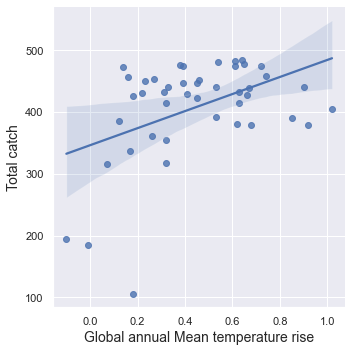

In [237]:
sns.lmplot(x = 'Annual_mean', y='total_catch', data = result1)
#plt.title('Sepal Width Vs Sepal Length', fontsize = 20)
plt.xlabel('Global annual Mean temperature rise', fontsize = 14)
plt.ylabel('Total catch', fontsize = 14)
plt.show()

<AxesSubplot:>

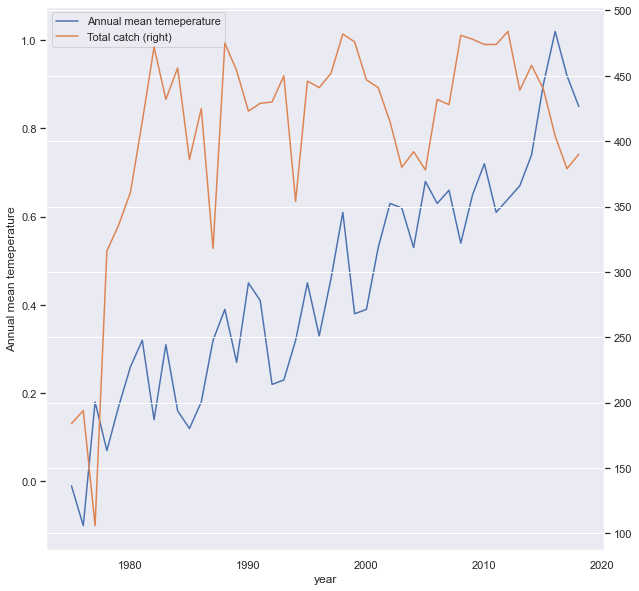

In [238]:
result1.Annual_mean.plot(label="Annual mean temeperature", legend=True, xlabel = 'Year', ylabel = 'Annual mean temeperature')
result1.total_catch.plot(secondary_y=True, label="Total catch", legend=True)

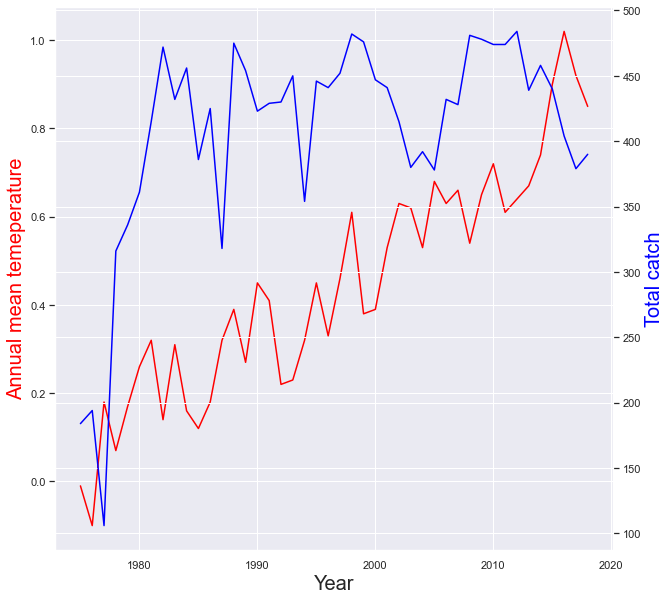

In [239]:
fig, ax = plt.subplots(figsize=(10,10)) 
ax1 = ax.twinx()
ax.set_xlabel("Year", fontsize = 20)

ax.set_ylabel("Annual mean temeperature", fontsize = 20)
ax1.set_ylabel("Total catch", fontsize = 20)

p1, = ax.plot(result1.Annual_mean,    color='red', label="Annual mean temeperature")
p2, = ax1.plot(result1.total_catch, color='blue', label="Total catch")

ax.yaxis.label.set_color('red')
ax1.yaxis.label.set_color('blue')
plt.savefig('/Users/macbookair/Documents/Institute of data/Number of Crabs caught per Year Annual mean temp.png', dpi=300, bbox_inches='tight')


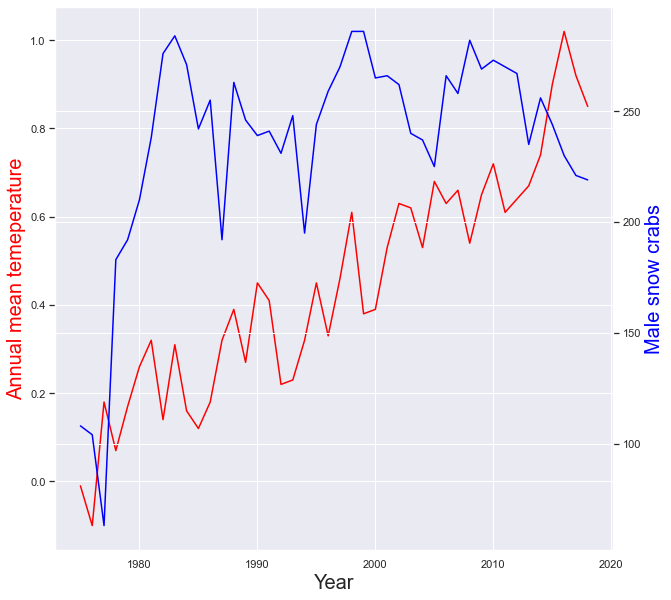

In [240]:
fig, ax = plt.subplots(figsize=(10,10)) 
ax1 = ax.twinx()
ax.set_xlabel("Year", fontsize = 20)

ax.set_ylabel("Annual mean temeperature", fontsize = 20)
ax1.set_ylabel("Male snow crabs", fontsize = 20)

p1, = ax.plot(result1.Annual_mean,    color='red', label="Annual mean temeperature")
p2, = ax1.plot(result1.male, color='blue', label="Male snow crabs")

ax.yaxis.label.set_color('red')
ax1.yaxis.label.set_color('blue')
plt.savefig('/Users/macbookair/Documents/Institute of data/Number of male Crabs caught per Year at mean Temperature.png', dpi=300, bbox_inches='tight')


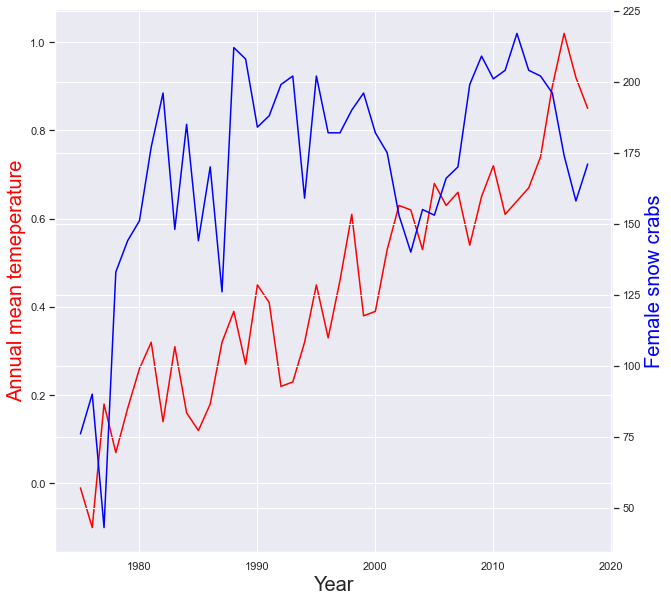

In [241]:
fig, ax = plt.subplots(figsize=(10,10)) 
ax1 = ax.twinx()
ax.set_xlabel("Year", fontsize = 20)

ax.set_ylabel("Annual mean temeperature", fontsize = 20)
ax1.set_ylabel("Female snow crabs", fontsize = 20)

p1, = ax.plot(result1.Annual_mean,    color='red', label="Annual mean temeperature")
p2, = ax1.plot(result1.female, color='blue', label="Female snow crabs")

ax.yaxis.label.set_color('red')
ax1.yaxis.label.set_color('blue')
plt.savefig('/Users/macbookair/Documents/Institute of data/Number of female Crabs caught per Year at mean Temperature.png', dpi=300, bbox_inches='tight')


<h3> Hypothesis Testing </h3>


In [242]:
df.head()

id  latitude  longitude  year       name   sex  bottom_depth  \
0  147038  57.00000 -166.45000  1975  snow crab  male            71   
1  147037  57.00000 -167.08333  1975  snow crab  male            71   
2  147036  57.00000 -167.68333  1975  snow crab  male            75   
3  147035  56.66667 -172.56667  1975  snow crab  male           132   
4  147034  56.66667 -171.96667  1975  snow crab  male           123   

   surface_temperature  bottom_temperature  haul    cpue  count  
0                  9.1                 1.1   117   40356      1  
1                  8.7                 1.4   118   68691      1  
2                  8.8                 1.6   139  119748      1  
3                  6.1                 2.5    89    7882      1  
4                  5.7                 2.1    90   11258      1

In [243]:
df_male_data = df[df['sex'] == 'male']

In [244]:
df_male_data.head()

id  latitude  longitude  year       name   sex  bottom_depth  \
0  147038  57.00000 -166.45000  1975  snow crab  male            71   
1  147037  57.00000 -167.08333  1975  snow crab  male            71   
2  147036  57.00000 -167.68333  1975  snow crab  male            75   
3  147035  56.66667 -172.56667  1975  snow crab  male           132   
4  147034  56.66667 -171.96667  1975  snow crab  male           123   

   surface_temperature  bottom_temperature  haul    cpue  count  
0                  9.1                 1.1   117   40356      1  
1                  8.7                 1.4   118   68691      1  
2                  8.8                 1.6   139  119748      1  
3                  6.1                 2.5    89    7882      1  
4                  5.7                 2.1    90   11258      1

In [245]:
df_female_data = df[df['sex'] == 'female']

In [246]:
df_female_data.head()

id  latitude  longitude  year       name     sex  bottom_depth  \
71  171038  57.33333 -167.71667  1975  snow crab  female            71   
78  171037  57.00000 -172.03333  1975  snow crab  female           113   
79  171036  57.00000 -171.40000  1975  snow crab  female           104   
80  171035  57.00000 -170.80000  1975  snow crab  female            95   
81  171034  57.03333 -170.25000  1975  snow crab  female            66   

    surface_temperature  bottom_temperature  haul    cpue  count  
71                  9.0                 1.6   138  345451      1  
78                  5.1                 1.5    87   16644      1  
79                  5.5                 1.8    84   81901      1  
80                  5.4                 3.3    82     622      1  
81                  4.2                 2.0    81    1727      1

In [247]:
male_latitude = df_male_data['latitude']
female_latitude = df_female_data['latitude']
male_longitude = df_male_data['longitude']
female_longitude = df_female_data['longitude']
male_bottom_depth = df_male_data['bottom_depth']
female_bottom_depth = df_female_data['bottom_depth']
male_surface_temperature = df_male_data['surface_temperature']
female_surface_temperature = df_female_data['surface_temperature']
male_bottom_temperature = df_male_data['bottom_temperature']
female_bottom_temperature = df_female_data['bottom_temperature']

In [248]:
male_latitude.mean()

58.29959211603122

In [249]:
male_bottom_temperature.mean()

1.9560753049659

In [250]:
female_bottom_temperature.mean()

1.5891165513571062

In [251]:
alpha = 0.05

In [252]:
from scipy import stats

In [253]:
def print_sig(p_value, alpha):
    if p_value < alpha:
        print("We reject our null hypothesis.")
    elif p_value > alpha:
        print("We fail to reject our null hypothesis.")
    else:
        print("Our test is inconclusive.")

In [254]:
t2, p2 = stats.ttest_ind(male_latitude,female_latitude)
print("t = " + str(t2))
print("p = " + str(p2))

print_sig(p2, alpha)

t = -21.970551178645643
p = 1.359497486277216e-105
We reject our null hypothesis.


In [255]:
t2, p2 = stats.ttest_ind(male_longitude,female_longitude)
print("t = " + str(t2))
print("p = " + str(p2))

print_sig(p2, alpha)

t = 23.70547091451017
p = 2.4041633421392125e-122
We reject our null hypothesis.


In [256]:
t2, p2 = stats.ttest_ind(male_bottom_depth,female_bottom_depth)
print("t = " + str(t2))
print("p = " + str(p2))

print_sig(p2, alpha)

t = -2.2743818848916506
p = 0.022954799193841965
We reject our null hypothesis.


In [257]:
t2, p2 = stats.ttest_ind(male_surface_temperature,female_surface_temperature)
print("t = " + str(t2))
print("p = " + str(p2))

print_sig(p2, alpha)

t = -6.455558745523425
p = 1.1058679172610694e-10
We reject our null hypothesis.


In [258]:
t2, p2 = stats.ttest_ind(male_bottom_temperature,female_bottom_temperature)
print("t = " + str(t2))
print("p = " + str(p2))

print_sig(p2, alpha)

t = 14.029708408663593
p = 1.7634518803633168e-44
We reject our null hypothesis.


In [259]:
male_latitude

0        57.00000
1        57.00000
2        57.00000
3        56.66667
4        56.66667
           ...   
17891    60.99612
17892    60.98815
17893    61.00035
17917    60.99732
17918    61.00018
Name: latitude, Length: 10411, dtype: float64

In [260]:
female_latitude

71       57.33333
78       57.00000
79       57.00000
80       57.00000
81       57.03333
           ...   
17922    59.01374
17923    58.70274
17924    58.67382
17925    58.66392
17926    58.66620
Name: latitude, Length: 7516, dtype: float64

<AxesSubplot:xlabel='latitude'>

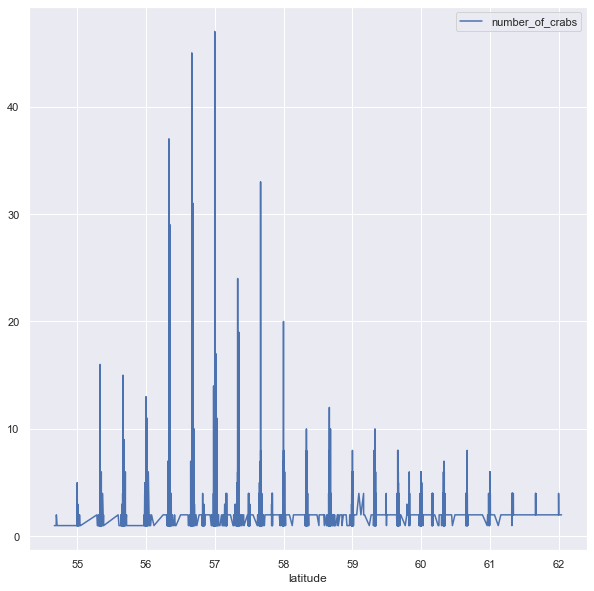

In [261]:
df_latitude_all = pd.DataFrame(df.groupby(df.latitude).size())
df_latitude_all.columns = ['number_of_crabs']
df_latitude_all.plot()

In [262]:
df_latitude_high = df_latitude_all[df_latitude_all['number_of_crabs']>15]
df_latitude_low = df_latitude_all[df_latitude_all['number_of_crabs']<15]

In [263]:
df_latitude_high

number_of_crabs
latitude                 
55.33333               16
56.33333               37
56.35000               29
56.66667               45
56.68333               31
57.00000               47
57.01667               17
57.33333               24
57.35000               19
57.66667               33
58.00000               20

<AxesSubplot:xlabel='longitude'>

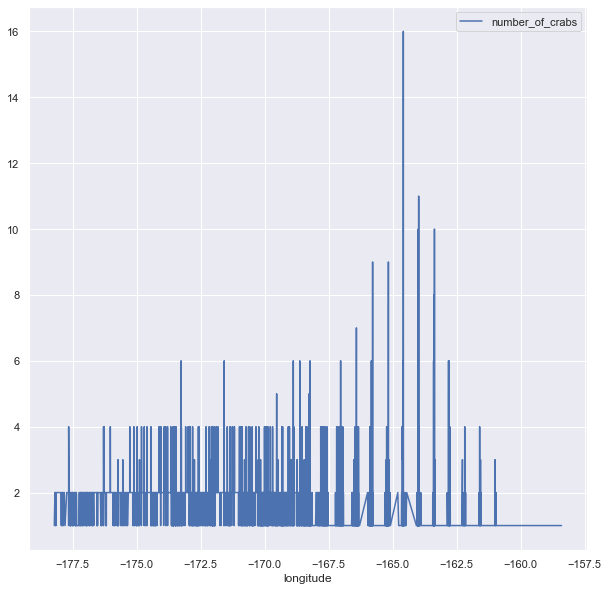

In [264]:
df_longitude_all = pd.DataFrame(df.groupby(df.longitude).size())
df_longitude_all.columns = ['number_of_crabs']
df_longitude_all.plot()

In [265]:
df_longitude_high = df_longitude_all[df_longitude_all['number_of_crabs']>6]
df_longitude_low = df_longitude_all[df_longitude_all['number_of_crabs']<6]

In [266]:
df_bottom_temp_all = pd.DataFrame(df.groupby(df.bottom_temperature).size())
df_bottom_temp_all.columns = ['number_of_crabs']
df_bottom_temp_all.median()

number_of_crabs    174.5
dtype: float64

In [267]:
df_bottom_temp_high = df_bottom_temp_all[df_bottom_temp_all['number_of_crabs']>174.5]

In [268]:
df_bottom_temp_high.head()

number_of_crabs
bottom_temperature                 
-1.6                            228
-1.5                            265
-1.4                            238
-1.3                            220
-1.2                            235

In [269]:
df_bottom_temp_high.index

Float64Index([-1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1.0, -0.5, -0.2,  0.0,  0.1,
               0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1.0,  1.1,  1.2,
               1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2.0,  2.1,  2.2,  2.3,
               2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3.0,  3.1,  3.2,  3.3,  3.4,
               3.5,  3.6,  3.7,  3.8,  3.9,  4.0,  4.1,  4.2],
             dtype='float64', name='bottom_temperature')

In [270]:
df_bottom_temp_low = df_bottom_temp_all[df_bottom_temp_all['number_of_crabs']<174.5]
df_bottom_temp_low.head()

number_of_crabs
bottom_temperature                 
-2.1                             10
-2.0                             10
-1.9                              2
-1.8                             10
-1.7                             74

In [271]:
df_surface_temp_all = pd.DataFrame(df.groupby(df.surface_temperature).size())
df_surface_temp_all.columns = ['number_of_crabs']
df_surface_temp_all

number_of_crabs
surface_temperature                 
-1.1                               2
-0.8                               2
-0.7                               2
-0.5                               2
-0.4                               4
...                              ...
 13.4                              2
 13.6                              2
 13.7                              2
 14.0                              2
 14.1                              2

[142 rows x 1 columns]

In [272]:
df_surface_temp_high = df_surface_temp_all[df_surface_temp_all['number_of_crabs']>300]
df_surface_temp_high.head()

number_of_crabs
surface_temperature                 
6.5                              318
6.6                              345
6.7                              304
6.8                              350
6.9                              327

In [273]:
df_surface_temp_low = df_surface_temp_all[df_surface_temp_all['number_of_crabs']<300]
df_surface_temp_low.head()

number_of_crabs
surface_temperature                 
-1.1                               2
-0.8                               2
-0.7                               2
-0.5                               2
-0.4                               4

In [274]:
df_bottom_depth_all = pd.DataFrame(df.groupby(df.bottom_depth).size())
df_bottom_depth_all.columns = ['number_of_crabs']
df_bottom_depth_all

number_of_crabs
bottom_depth                 
22                          1
26                          3
29                          3
31                          3
33                         18
...                       ...
194                         2
201                         1
218                         1
230                         1
276                         2

[155 rows x 1 columns]

In [275]:
df_bottom_depth_high = df_bottom_depth_all[df_bottom_depth_all['number_of_crabs']>300]
df_bottom_depth_high.head()

number_of_crabs
bottom_depth                 
60                        308
62                        319
64                        426
66                        531
68                        557

In [276]:
df_bottom_depth_low = df_bottom_depth_all[df_bottom_depth_all['number_of_crabs']<300]
df_bottom_depth_low.head()

number_of_crabs
bottom_depth                 
22                          1
26                          3
29                          3
31                          3
33                         18

In [277]:
snow_crab_economics = pd.read_csv('/Users/macbookair/Documents/Institute of data/foss_landings.csv')

In [278]:
snow_crab_economics.head()

Year      Pounds Metric Tons     Dollars  Collection
0  2000  32,810,551      14,883  60,535,468  Commercial
1  1968   3,246,800       1,473     323,590  Commercial
2  1981  41,859,644      18,987  11,050,946  Commercial
3  1982  28,328,870      12,850  17,067,382  Commercial
4  1983  24,810,124      11,254   9,217,997  Commercial

In [279]:
snow_crab_economics['Year'] = sorted(snow_crab_economics['Year']) 

In [280]:
snow_crab_economics.head()

Year      Pounds Metric Tons     Dollars  Collection
0  1968  32,810,551      14,883  60,535,468  Commercial
1  1981   3,246,800       1,473     323,590  Commercial
2  1982  41,859,644      18,987  11,050,946  Commercial
3  1983  28,328,870      12,850  17,067,382  Commercial
4  1984  24,810,124      11,254   9,217,997  Commercial

In [281]:
snow_crab_economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         41 non-null     int64 
 1   Pounds       41 non-null     object
 2   Metric Tons  41 non-null     object
 3   Dollars      41 non-null     object
 4   Collection   41 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.7+ KB


In [282]:
 snow_crab_economics['Pounds'] = snow_crab_economics['Pounds'].str.replace(',', '')
 snow_crab_economics['Metric Tons'] = snow_crab_economics['Metric Tons'].str.replace(',', '') 
 snow_crab_economics['Dollars'] = snow_crab_economics['Dollars'].str.replace(',', '')

In [283]:
snow_crab_economics['Pounds'] = snow_crab_economics.Pounds.astype(float)
snow_crab_economics['Metric Tons'] = snow_crab_economics['Metric Tons'].astype(float)
snow_crab_economics['Dollars'] = snow_crab_economics.Dollars.astype(float);


In [284]:
snow_crab_economics.set_index('Year', inplace = True)

In [285]:
snow_crab_economics.head()

Pounds  Metric Tons     Dollars  Collection
Year                                                 
1968  32810551.0      14883.0  60535468.0  Commercial
1981   3246800.0       1473.0    323590.0  Commercial
1982  41859644.0      18987.0  11050946.0  Commercial
1983  28328870.0      12850.0  17067382.0  Commercial
1984  24810124.0      11254.0   9217997.0  Commercial

In [286]:
snow_crab_economics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 1968 to 2020
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pounds       41 non-null     float64
 1   Metric Tons  41 non-null     float64
 2   Dollars      41 non-null     float64
 3   Collection   41 non-null     object 
dtypes: float64(3), object(1)
memory usage: 1.6+ KB


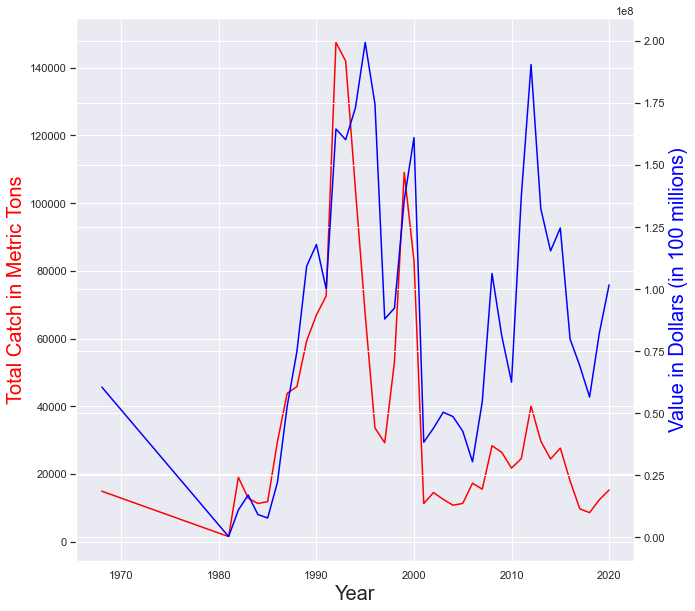

In [287]:
fig, ax = plt.subplots(figsize=(10,10)) 
ax1 = ax.twinx()
ax.set_xlabel("Year", fontsize = 20)

ax.set_ylabel("Total Catch in Metric Tons", fontsize = 20)
ax1.set_ylabel("Value in Dollars (in 100 millions)", fontsize = 20)

p1, = ax.plot(snow_crab_economics['Metric Tons'], color='red', label="Metric Tons")
p2, = ax1.plot(snow_crab_economics['Dollars'], color='blue', label="Dollars")

ax.yaxis.label.set_color('red')
ax1.yaxis.label.set_color('blue')
plt.savefig('/Users/macbookair/Documents/Institute of data/metric tons vs value.png', dpi=300, bbox_inches='tight')

In [288]:
snow_crab_economics['value_per_metric_ton'] = snow_crab_economics['Dollars']/snow_crab_economics['Metric Tons']  

In [289]:
snow_crab_economics.head()

Pounds  Metric Tons     Dollars  Collection  value_per_metric_ton
Year                                                                       
1968  32810551.0      14883.0  60535468.0  Commercial           4067.423772
1981   3246800.0       1473.0    323590.0  Commercial            219.680923
1982  41859644.0      18987.0  11050946.0  Commercial            582.026966
1983  28328870.0      12850.0  17067382.0  Commercial           1328.200934
1984  24810124.0      11254.0   9217997.0  Commercial            819.086280

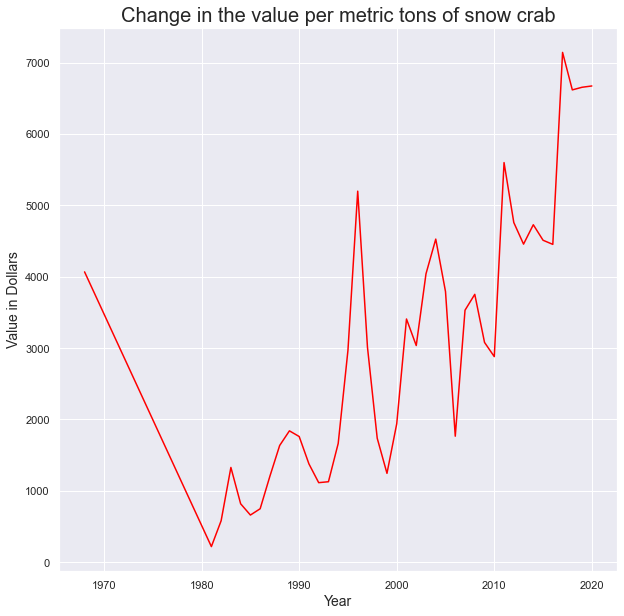

In [290]:
plt.plot(snow_crab_economics['value_per_metric_ton'], color='red', label="value_per_metric_ton")
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Value in Dollars', fontsize = 14)
plt.title('Change in the value per metric tons of snow crab', fontsize = 20)
plt.savefig('/Users/macbookair/Documents/Institute of data/Change in the value per metric tons of snow crab.png', dpi=300, bbox_inches='tight')

In [291]:
t2, p2 = stats.ttest_ind(df_bottom_temp_high.index,df_bottom_temp_low.index)
print("t = " + str(t2))
print("p = " + str(p2))

print_sig(p2, alpha)

t = -5.9335567872560615
p = 4.101904728776777e-08
We reject our null hypothesis.


In [292]:
t2, p2 = stats.ttest_ind(df_surface_temp_high.index,df_surface_temp_low.index)
print("t = " + str(t2))
print("p = " + str(p2))

print_sig(p2, alpha)

t = 2.024620319186603
p = 0.04480788012260066
We reject our null hypothesis.


In [293]:
t2, p2 = stats.ttest_ind(df_bottom_depth_high.index, df_bottom_depth_low.index)
print("t = " + str(t2))
print("p = " + str(p2))

print_sig(p2, alpha)

t = -2.695597105947422
p = 0.0078127385814152
We reject our null hypothesis.


In [294]:
t2, p2 = stats.ttest_ind(df_latitude_high.index,df_latitude_low.index)
print("t = " + str(t2))
print("p = " + str(p2))

print_sig(p2, alpha)

t = -2.791039011357736
p = 0.005265063254088173
We reject our null hypothesis.


In [295]:
t2, p2 = stats.ttest_ind(df_longitude_high.index,df_longitude_low.index)
print("t = " + str(t2))
print("p = " + str(p2))

print_sig(p2, alpha)

t = 3.9059221411946417
p = 9.446897202481055e-05
We reject our null hypothesis.
